CODETECH INTERNSHIP

DEEKSHA MANDAL

# TASK ONE: EXPLORATORY DATA ANALYSIS (EDA)

Start with a dataset of your choice and perform EDA using libraries like pandas, numpy, and matplotlib or seaborn.

Explore the data's characteristics, distributions, correlations,
and outliers.

Visualize your findings with histograms, scatter plots, and heatmaps to
gain insights into the data.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart_disease_dataset.csv to heart_disease_dataset (1).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
df= pd.read_csv('/content/heart_disease_dataset (1).csv')

In [ ]:
df.head()

Age  Gender  Cholesterol  Blood Pressure  Heart Rate  Smoking  \
0   75  Female          228             119          66  Current   
1   48    Male          204             165          62  Current   
2   53    Male          234              91          67    Never   
3   69  Female          192              90          72  Current   
4   62  Female          172             163          93    Never   

  Alcohol Intake  Exercise Hours Family History Diabetes Obesity  \
0          Heavy               1             No       No     Yes   
1            NaN               5             No       No      No   
2          Heavy               3            Yes       No     Yes   
3            NaN               4             No      Yes      No   
4            NaN               6             No      Yes      No   

   Stress Level  Blood Sugar Exercise Induced Angina   Chest Pain Type  \
0             8          119                     Yes   Atypical Angina   
1             9           70                     Yes    Typical Angina   
2             5          196                     Yes   Atypical Angina   
3             7          107                     Yes  Non-anginal Pain   
4             2          183                     Yes      Asymptomatic   

   Heart Disease  
0              1  
1              0  
2              1  
3              0  
4              0

# Let's explore the dataset

In [ ]:
print('Shape of the dataset', df.shape)
print('\n')
print('Information about columns and datatypes:', df.info())
print('\n')
print('columns with null values in percentage', round(100*df.isna().sum()/len(df),2))
print('\n')
print('Descriptive stats of the data:', df.describe())

Shape of the dataset (1000, 16)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           660 non-null    object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest P

# Data Preprocessing

Counting everyone's alcohol intakes.

In [ ]:
df['Alcohol Intake'].value_counts()

Alcohol Intake
Heavy       346
Moderate    314
Name: count, dtype: int64

Lets consider that the null values in this column are also moderate drinkers.

In [ ]:
df['Alcohol Intake'].fillna('NA',inplace= True)

Let's recheck our column if all the null values have been replaced

In [ ]:
categ_cols = ["Gender", "Smoking", "Alcohol Intake", "Family History",
       "Diabetes", "Obesity", "Exercise Induced Angina", "Chest Pain Type",
       "Heart Disease"]

nums = [i for i in df.columns if i not in categ_cols]

In [ ]:
print('Type of values in the Alcohol intake column\n', df['Alcohol Intake'].value_counts())

Type of values in the Alcohol intake column
 Alcohol Intake
Heavy       346
NA          340
Moderate    314
Name: count, dtype: int64


Let's see what ages of people we have

In [ ]:
print('Youngest in the dataset is of age', min(df.Age))
print('Oldest in the dataset is of age', max(df.Age))

youngest in the dataset is of age 25
Oldest in the dataset is of age 79



Creating categorical columns separately so that we can create a function to show all graphs at once.

In [ ]:
categ_cols= [x for x in df.columns if df[x].dtype == 'object']
categ_cols

['Gender',
 'Smoking',
 'Alcohol Intake',
 'Family History',
 'Diabetes',
 'Obesity',
 'Exercise Induced Angina',
 'Chest Pain Type']

In [ ]:
def cat_graphs(ax, c):
    sns.countplot(data=df, x='Heart Disease', hue= c, ax=ax)
    ax.set_title(f'Countplot for Heart Disease by {c}')

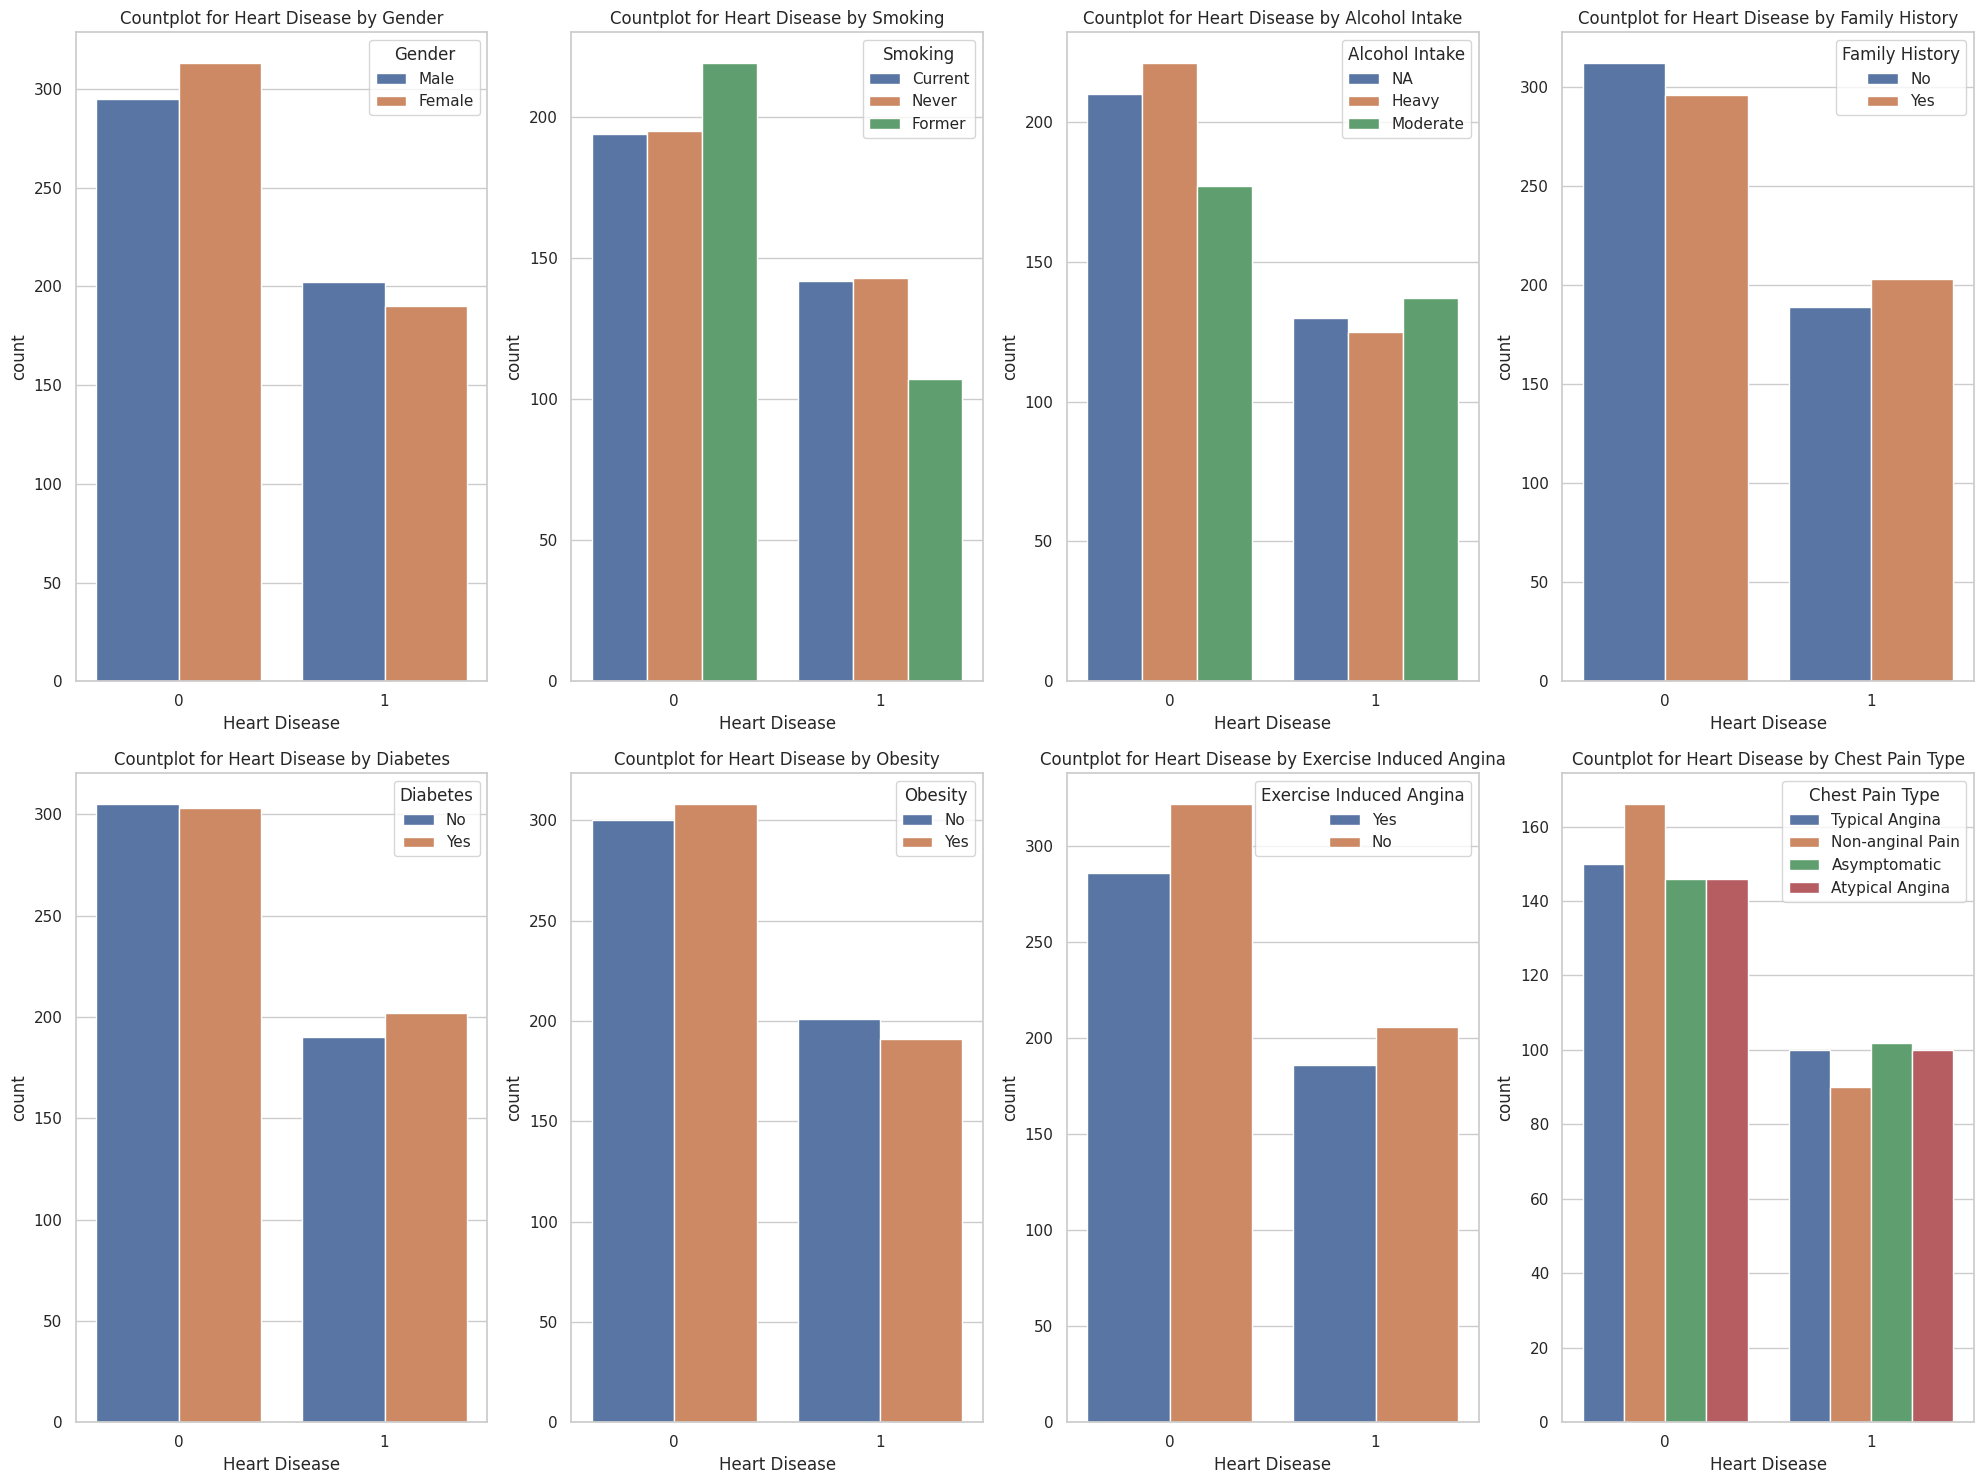

In [ ]:
n_row=2
n_col=4
fig, axs = plt.subplots(n_row, n_col, figsize=(20,15))  # Create a 2x4 grid of subplots

for ax, col in zip(axs.flatten(), cat_cols):
    cat_graphs(ax, col)

plt.tight_layout()
plt.show()

#for i in cat_cols:
 #   cat_graphs(i)

# Inferences from the data:

1. Males are at higher risk of heart disease.
2. Those who have never smoked have a higher rate of heart disease, and the lowest rate is in those who are former smokers.
People who have a family history of heart disease are more likely to develop it.
3. Diabetics are more likely to get heart disease.

Analyze distributions of numerical features

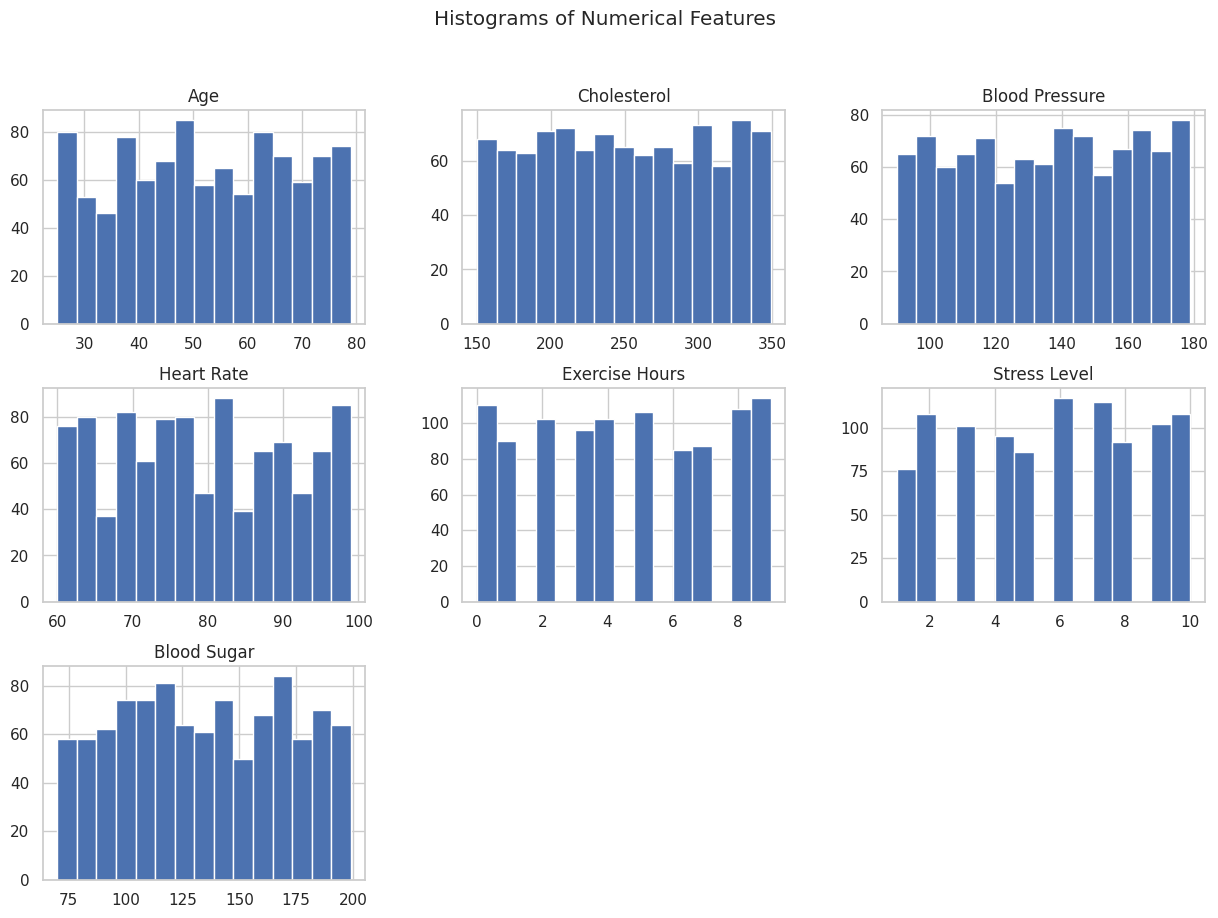

In [ ]:
# Histograms of numerical features
numerical_features = ['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Exercise Hours', 'Stress Level', 'Blood Sugar']

df[numerical_features].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Histograms of Numerical Features')
plt.show()

Identify and visualize outliers

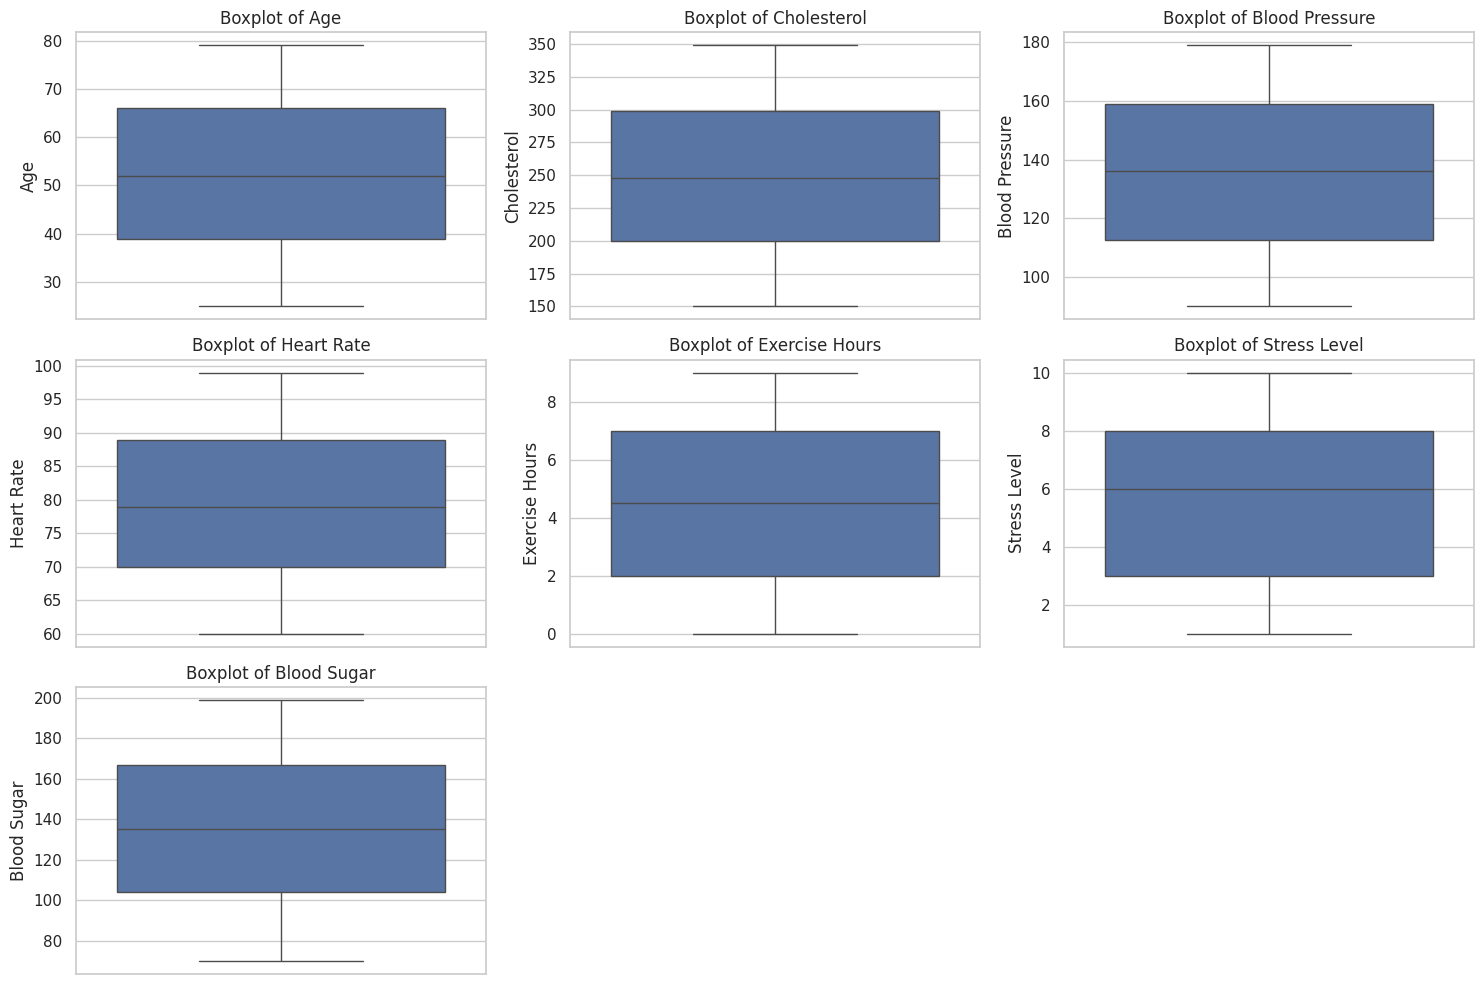

In [ ]:
# Boxplots to identify outliers in numerical features
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=feature, data=df)
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

Influence of different categorical values on presence of heart disease

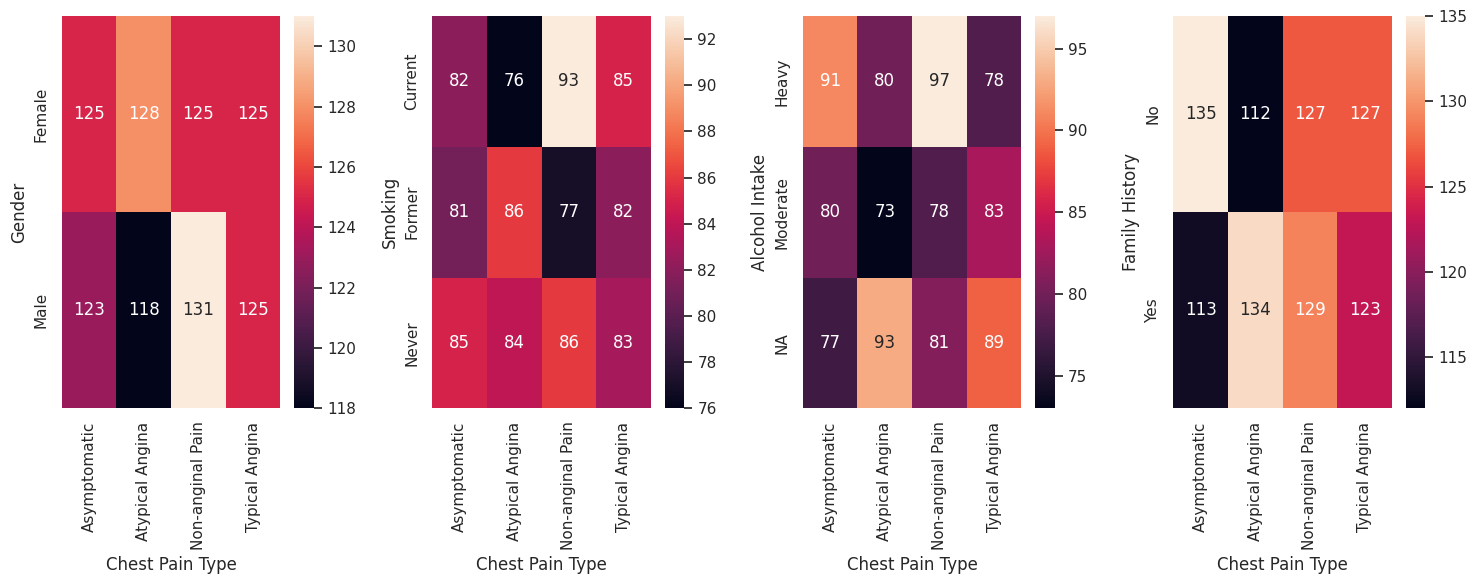

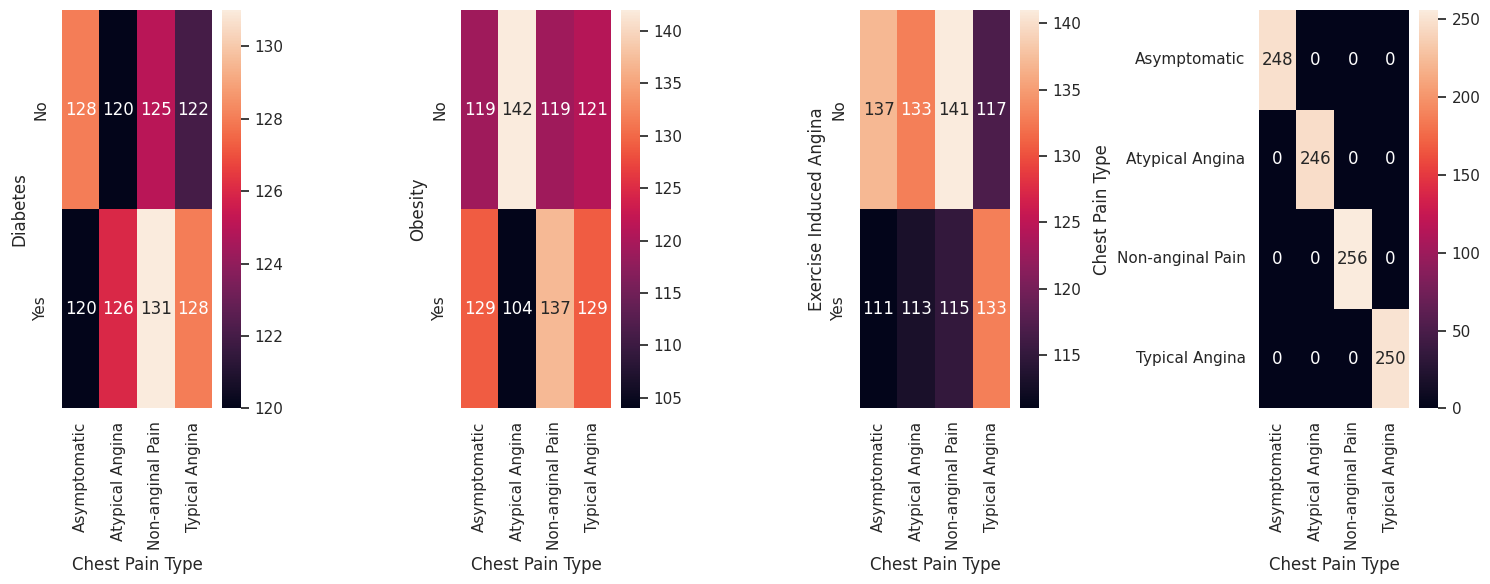

In [ ]:
index = 0
for i in range(2):
    fig, axes = plt.subplots(ncols=4, figsize=(15, 6))
    for j in range(4):
        sns.heatmap(pd.crosstab(df[categ_cols[index]], df[categ_cols[-1]]), annot=True, ax=axes[j], fmt='d')
        index += 1
    plt.tight_layout()
    plt.show()

Numerical data distribution among patients with and without heart disease

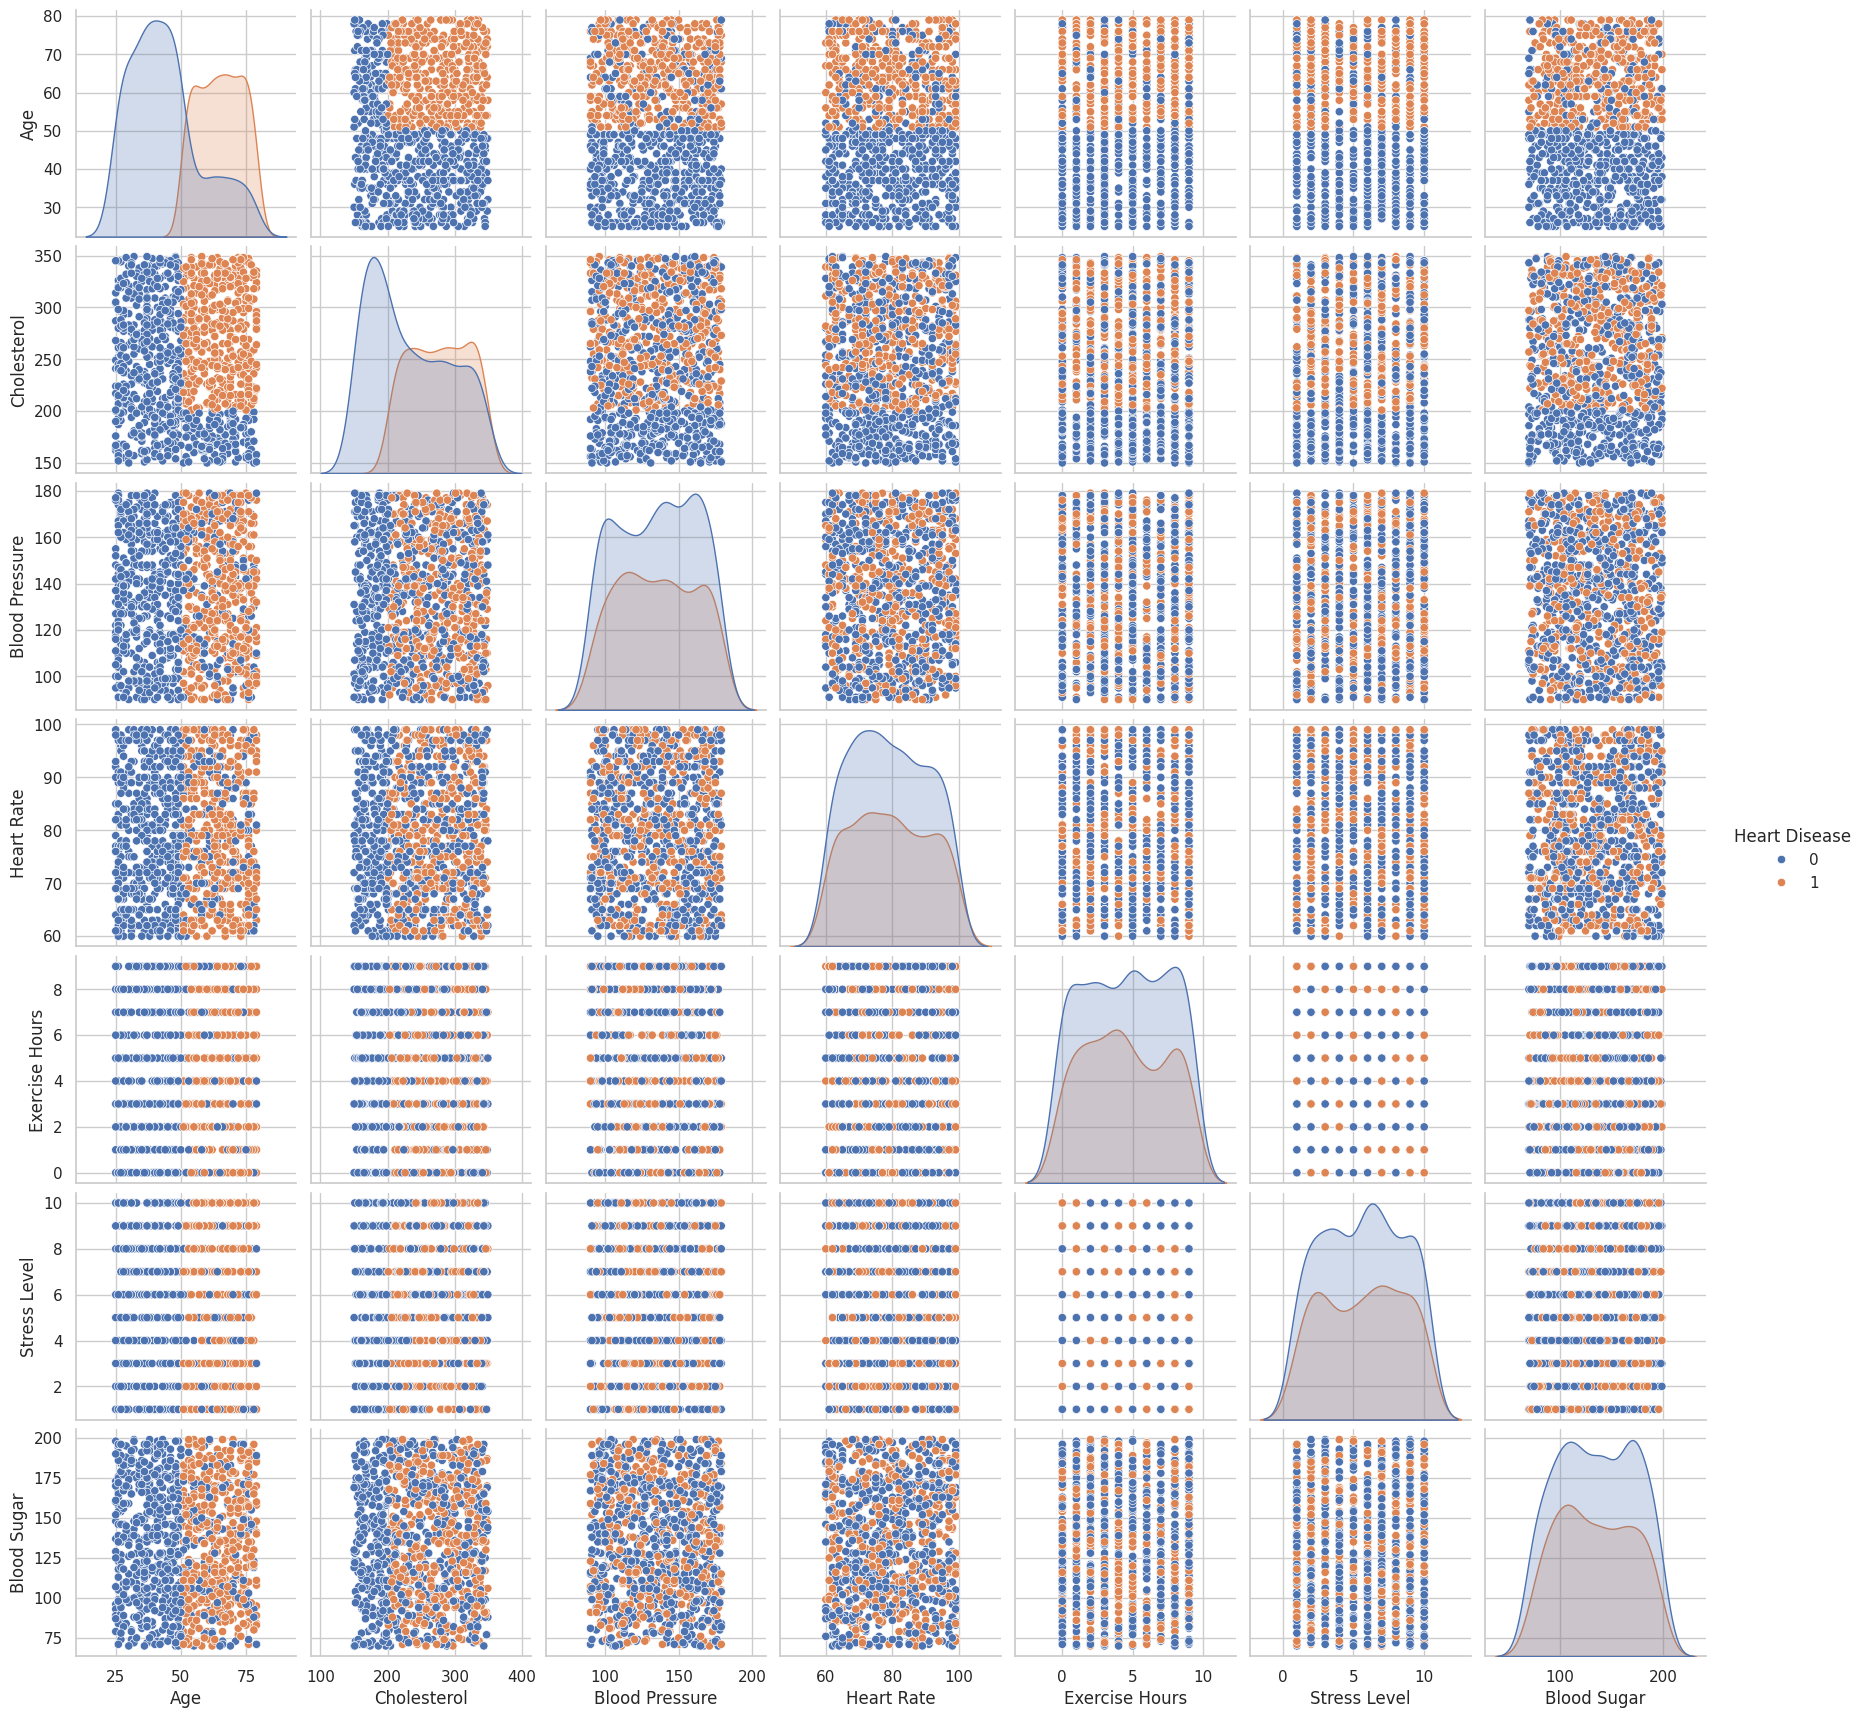

In [ ]:
sns.pairplot(df, vars=nums, hue=categ_cols[-1])
plt.show()

Let's understand the numerical columns with some more visualizations

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols

['Age',
 'Cholesterol',
 'Blood Pressure',
 'Heart Rate',
 'Exercise Hours',
 'Stress Level',
 'Blood Sugar',
 'Heart Disease']

In [ ]:
#Remove heart disease column name from the numerical columns becuse it's the target variable
num_cols.remove('Heart Disease')

Age
Skew : -0.03


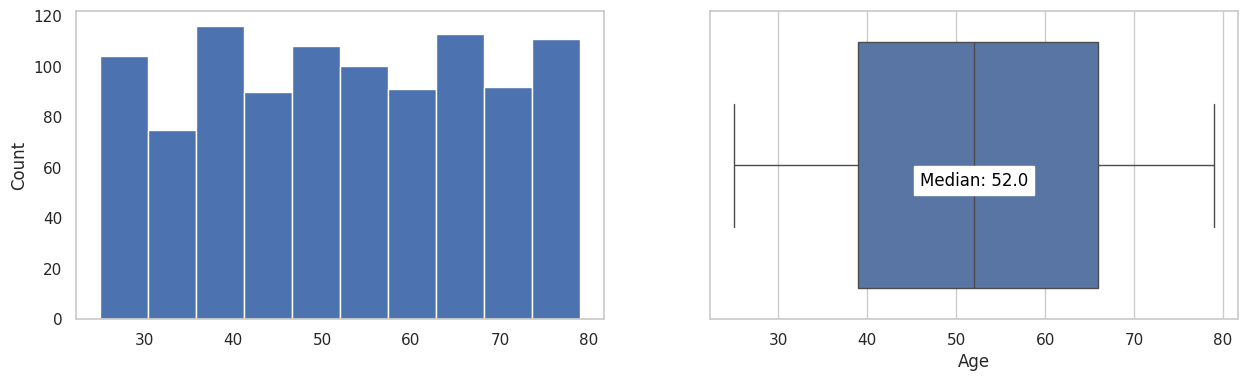

Cholesterol
Skew : 0.01


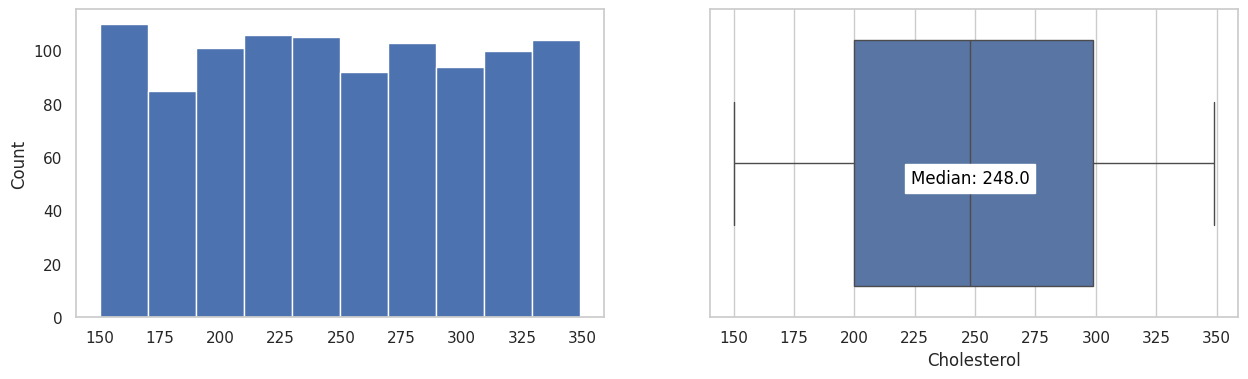

Blood Pressure
Skew : -0.04


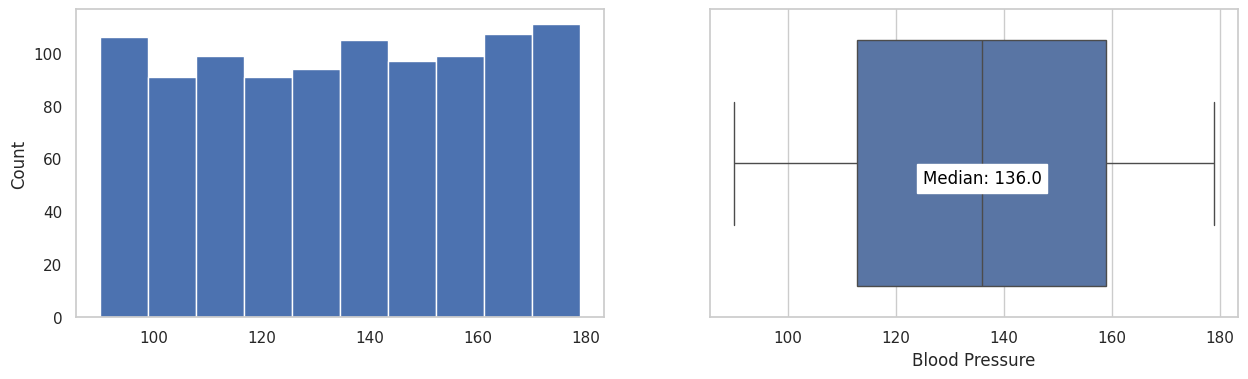

Heart Rate
Skew : 0.08


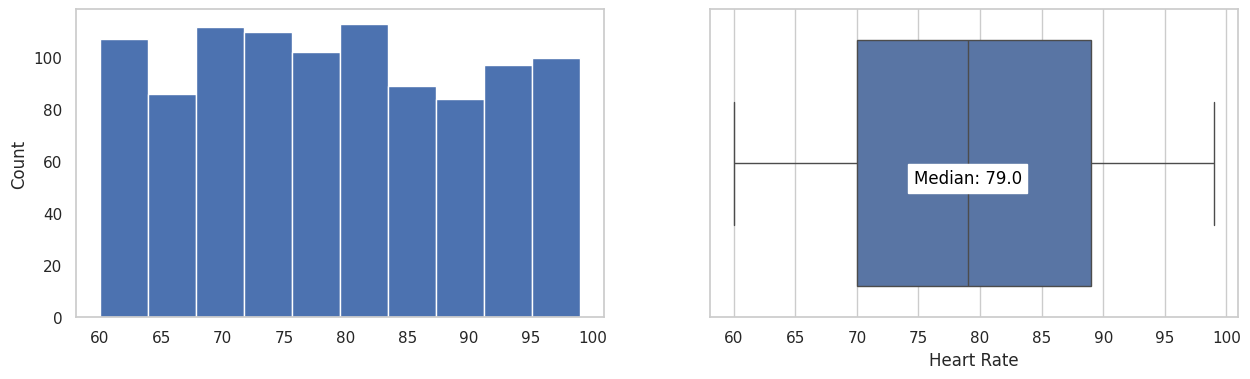

Exercise Hours
Skew : 0.0


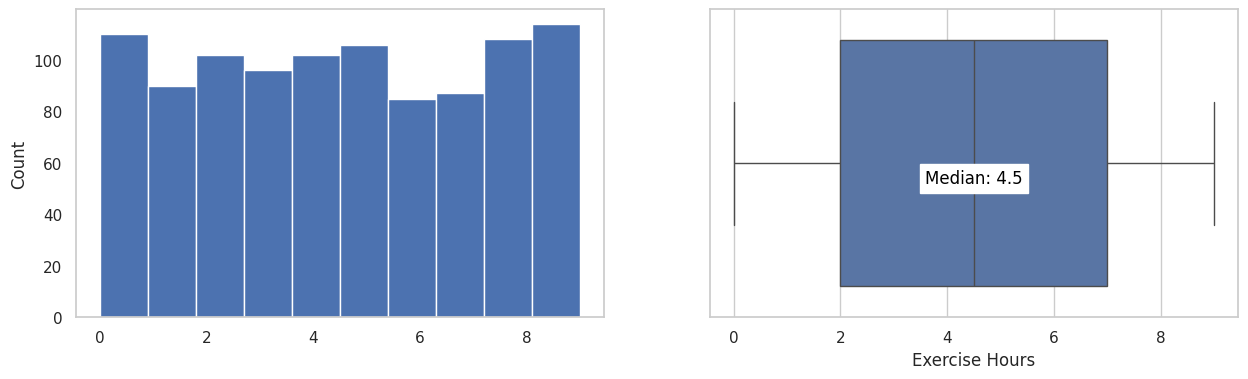

Stress Level
Skew : -0.04


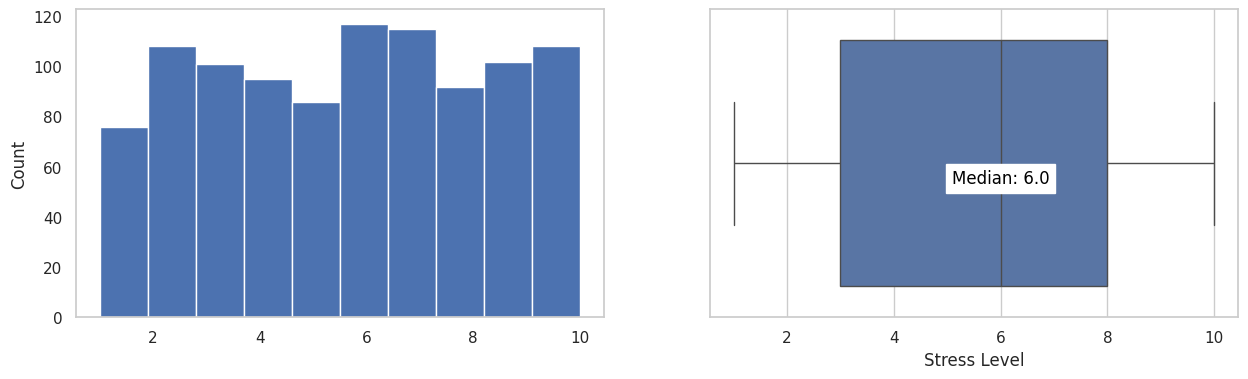

Blood Sugar
Skew : 0.01


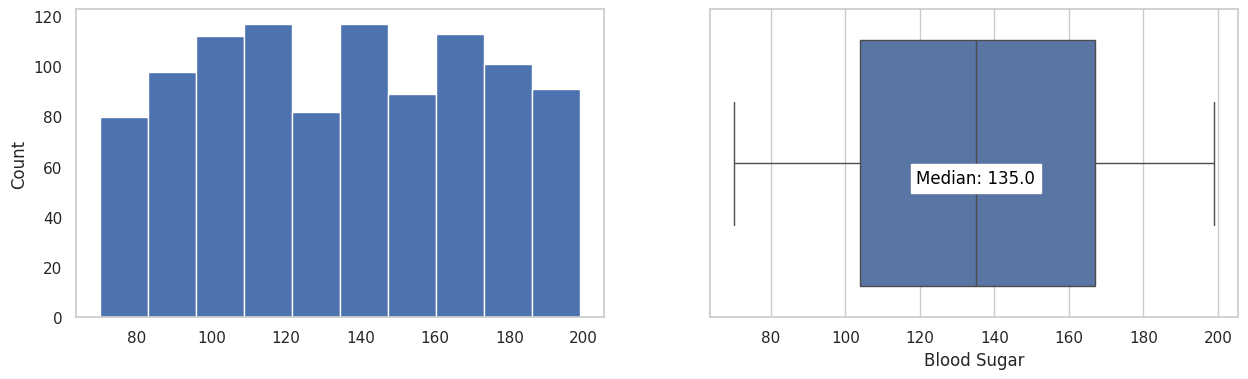

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))

    # Create the figure
    plt.figure(figsize=(15, 4))

    # Histogram subplot
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('Count')

    # Boxplot subplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])

    # Calculate the median
    median = df[col].median()

    # Add the median label to the box plot
    plt.text(median, 0.05, f'Median: {median}', color='black', ha='center', va='center', backgroundcolor='white')

    # Display the plots
    plt.show()

# Inferences from the Numerical data analysis:
1. Numerical data analysis gives insights into median values and skewness.
2. Columns with zero skewness indicate that the mean and median values are the same.
3. The average cholesterol levels are high in the sample data.

In [ ]:
y= df['Heart Disease']

In [ ]:
#checking heart disease rate
rate_of_heart_disease= 100* sum(y)/len(y)
rate_of_heart_disease

39.2

We have heart disease rate of 39.2 percent.

# TASK TWO: PREDICTIVE MODELING WITH LINEAR REGRESSION
Implement a simple linear regression model using a dataset with continuous
target variables.

Split the data into training and testing sets, train the model on
the training data, evaluate its performance using metrics like mean squared
error or R-squared, and make predictions on the test set.

Visualize the regression line and actual vs. predicted values to assess the model's accuracy.

In [102]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

In [103]:
hour_df = pd.read_csv("/content/hour.csv")
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [104]:
daily_df = pd.read_csv("/content/hour.csv")
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [105]:
hour_df.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [106]:
daily_df.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

# Data Preprocessing

In [107]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [109]:
hour_df['hr'].value_counts()

hr
17    730
16    730
13    729
15    729
14    729
12    728
22    728
21    728
20    728
19    728
18    728
23    728
11    727
10    727
9     727
8     727
7     727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: count, dtype: int64

In [110]:
daily_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [111]:
daily_df['hr'].value_counts()

hr
17    730
16    730
13    729
15    729
14    729
12    728
22    728
21    728
20    728
19    728
18    728
23    728
11    727
10    727
9     727
8     727
7     727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: count, dtype: int64

In [112]:
daily_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [113]:
daily_df[['temp','hum','windspeed']].describe()

temp           hum     windspeed
count  17379.000000  17379.000000  17379.000000
mean       0.496987      0.627229      0.190098
std        0.192556      0.192930      0.122340
min        0.020000      0.000000      0.000000
25%        0.340000      0.480000      0.104500
50%        0.500000      0.630000      0.194000
75%        0.660000      0.780000      0.253700
max        1.000000      1.000000      0.850700

On nearly two thirds of the days the weathersite was good in Washington, D.C., on one third it was medium (cloudy) and in a few cases it was even poor. The expression "very poor" (Heavy Rain, Thunderstorm etc.) isn't even used during the time period in our dataset.

In [139]:
daily_df['weathersit'].value_counts(normalize=True)

weathersit
1    0.656712
2    0.261465
3    0.081650
4    0.000173
Name: proportion, dtype: float64

To get an overview in which season which weathersites have occurred, we use the crosstab-function. We see that good weathersites have occurred more often during the summer, and the poor weathersite more often in the winter (remember from the variable description that wathersite is about rainfall and clouds and not about temperature, so this is not so trivial as it sounds).

In [140]:
pd.crosstab(daily_df.weathersit, daily_df.season)

season         1     2     3     4
weathersit                        
1           2665  2859  3280  2609
2           1205  1144   947  1248
3            369   406   269   375
4              3     0     0     0

In [114]:
# Renaming columns names to more readable names
hour_df.rename(columns={'instant':'rec_id',
                        'dteday':'datetime',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'hr':'hour',
                        'yr':'year'},inplace=True)

In [115]:
# date time conversion
hour_df['datetime'] = pd.to_datetime(hour_df.datetime)

# categorical variables
hour_df['season'] = hour_df.season.astype('category')
hour_df['is_holiday'] = hour_df.is_holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['weather_condition'] = hour_df.weather_condition.astype('category')
hour_df['is_workingday'] = hour_df.is_workingday.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['hour'] = hour_df.hour.astype('category')

In [116]:
# Separate numerical and categorical columns
numerical_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'total_count']
categorical_cols = ['season', 'is_holiday', 'weekday', 'is_workingday', 'weather_condition']

In [117]:
# Check for missing values
print(hour_df.isnull().sum())

rec_id               0
datetime             0
season               0
year                 0
month                0
hour                 0
is_holiday           0
weekday              0
is_workingday        0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64


In [118]:
# Check for duplicates
print(hour_df.duplicated().sum())

0


In [119]:
# Check for missing values in 'temp', 'humidity', and 'windspeed'
missing_values = hour_df[['temp', 'humidity', 'windspeed']].isnull().sum()
print(f"Missing values before filling: {missing_values}")

# Handle missing values if any (filling with median as an example)
hour_df[['temp', 'humidity', 'windspeed']] = hour_df[['temp', 'humidity', 'windspeed']].fillna(hour_df[['temp', 'humidity', 'windspeed']].median())

Missing values before filling: temp         0
humidity     0
windspeed    0
dtype: int64


In [ ]:
# Remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from numerical columns
numerical_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'total_count']
for col in numerical_cols:
    hour_df = remove_outliers(hour_df, col)

In [120]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
hour_df[numerical_cols] = scaler.fit_transform(hour_df[numerical_cols])

In [121]:
# Create dummy variables for categorical features
hour_df = pd.get_dummies(hour_df, columns=categorical_cols, drop_first=True)

In [122]:
# Display the cleaned dataset
hour_df.head()

rec_id   datetime year month hour      temp     atemp  humidity  windspeed  \
0       1 2011-01-01    0     1    0 -1.334648 -1.093281  0.947372  -1.553889   
1       2 2011-01-01    0     1    1 -1.438516 -1.181732  0.895539  -1.553889   
2       3 2011-01-01    0     1    2 -1.438516 -1.181732  0.895539  -1.553889   
3       4 2011-01-01    0     1    3 -1.334648 -1.093281  0.636370  -1.553889   
4       5 2011-01-01    0     1    4 -1.334648 -1.093281  0.636370  -1.553889   

     casual  ...  weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  \
0 -0.662755  ...      False      False      False      False      False   
1 -0.561343  ...      False      False      False      False      False   
2 -0.622190  ...      False      False      False      False      False   
3 -0.662755  ...      False      False      False      False      False   
4 -0.723603  ...      False      False      False      False      False   

   weekday_6  is_workingday_1  weather_condition_2  weather_condition_3  \
0       True            False                False                False   
1       True            False                False                False   
2       True            False                False                False   
3       True            False                False                False   
4       True            False                False                False   

   weather_condition_4  
0                False  
1                False  
2                False  
3                False  
4                False  

[5 rows x 26 columns]

In [123]:
# Select features and the target variable
# Select features and target variable
features = ['temp', 'humidity', 'windspeed']
target = 'total_count'

X = hour_df[features]
y = hour_df[target]

# Display the first few rows of the features and target variable
print(X.head())
print(y.head())

       temp  humidity  windspeed
0 -1.334648  0.947372  -1.553889
1 -1.438516  0.895539  -1.553889
2 -1.438516  0.895539  -1.553889
3 -1.334648  0.636370  -1.553889
4 -1.334648  0.636370  -1.553889
0   -0.956339
1   -0.824022
2   -0.868128
3   -0.972879
4   -1.039037
Name: total_count, dtype: float64


In [124]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
from sklearn.linear_model import LinearRegression

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [126]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.7159316789246276
R-squared: 0.25616494747598406


**Mean Squared Error (MSE) of 23553.84:**
The model's predictions are, on average, off by the squared error of 23553.84. This is a measure of the model's accuracy, with lower values indicating better performance.

**R-squared (R²) of 0.256:**
The model explains about 25.6% of the variance in the total count of bike rentals. This indicates that the model has a moderate fit to the data, but there is significant room for improvement.

# What to Do Next?
Feature Engineering, Maybe?
Consider adding or transforming features to improve the model. For example, including interactions between features or creating polynomial features.

In [127]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Ensure 'datetime' column is in datetime format
hour_df['datetime'] = pd.to_datetime(hour_df['datetime'])

# Check for missing values in 'temp', 'humidity', and 'windspeed'
missing_values = hour_df[['temp', 'humidity', 'windspeed']].isnull().sum()
print(f"Missing values before filling: {missing_values}")

# Handle missing values if any (filling with median as an example)
hour_df[['temp', 'humidity', 'windspeed']] = hour_df[['temp', 'humidity', 'windspeed']].fillna(hour_df[['temp', 'humidity', 'windspeed']].median())

# Remove any potential duplicates
hour_df = hour_df.loc[:, ~hour_df.columns.duplicated()]

# 1. Interaction Features: Creating interaction terms
hour_df['temp_humidity_interaction'] = hour_df['temp'] * hour_df['humidity']
hour_df['temp_windspeed_interaction'] = hour_df['temp'] * hour_df['windspeed']

# 2. Polynomial Features: Creating polynomial features for 'temp', 'humidity', and 'windspeed'
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(hour_df[['temp', 'humidity', 'windspeed']])
poly_feature_names = poly.get_feature_names_out(['temp', 'humidity', 'windspeed'])
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)

# Ensure the indices match before concatenation
poly_df.index = hour_df.index

# Add polynomial features to the dataset
hour_df = pd.concat([hour_df, poly_df], axis=1)

# 3. Temporal Features: Extracting day of the week, and whether the day is a weekend
hour_df['day_of_month'] = hour_df['datetime'].dt.day
hour_df['is_weekend'] = (hour_df['datetime'].dt.weekday >= 5).astype(int)

# Drop the datetime column as it's not needed anymore
hour_df.drop(columns=['datetime'], inplace=True)

# 4. Feature Selection: Using RFE with RandomForest to select important features
# Define features and target
features = hour_df.drop(columns=['total_count', 'casual', 'registered'])
target = hour_df['total_count']

# Initialize RandomForestRegressor and RFE
model = RandomForestRegressor(random_state=42)
rfe = RFE(estimator=model, n_features_to_select=10)

# Fit RFE
rfe.fit(features, target)

# Get the selected features
selected_features = features.columns[rfe.support_]

# Create a new dataset with only the selected features
hour_df_selected = hour_df[selected_features]

# Display selected features
print("Selected Features:", selected_features)

# Proceed with the model training using selected features
X_train, X_test, y_train, y_test = train_test_split(hour_df_selected, target, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error after Feature Engineering: {mse}')
print(f'R-squared after Feature Engineering: {r2}')

Missing values before filling: temp         0
humidity     0
windspeed    0
dtype: int64
Selected Features: Index(['rec_id', 'hour', 'temp', 'atemp', 'is_workingday_1',
       'weather_condition_3', 'temp', 'humidity', 'temp humidity',
       'is_weekend'],
      dtype='object')
Mean Squared Error after Feature Engineering: 0.5865999226512512
R-squared after Feature Engineering: 0.39053739746329375


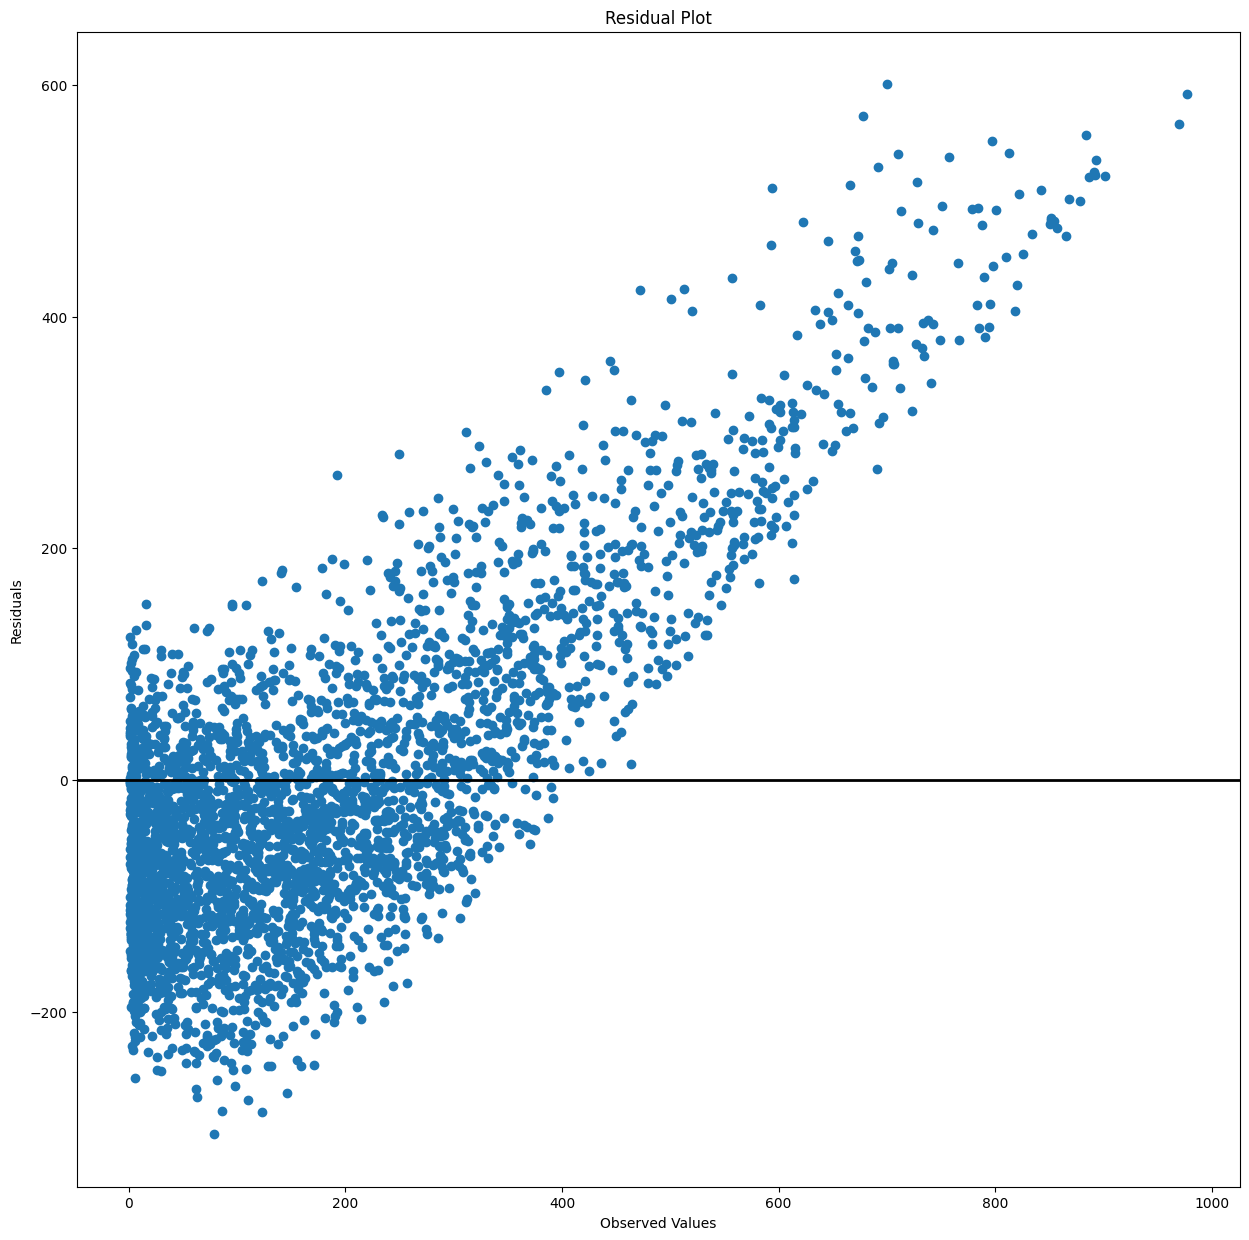

In [67]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(y_test, residuals)
ax.axhline(y=0, color='black', linestyle='-', linewidth=2)
ax.set_xlabel('Observed Values')
ax.set_ylabel('Residuals')
ax.set_title('Residual Plot')
plt.show()

# Visualizations/EDA

This is perhaps the most interesting part, then working with data, because you need some creativity and craftiness here. Some things that stand out are:

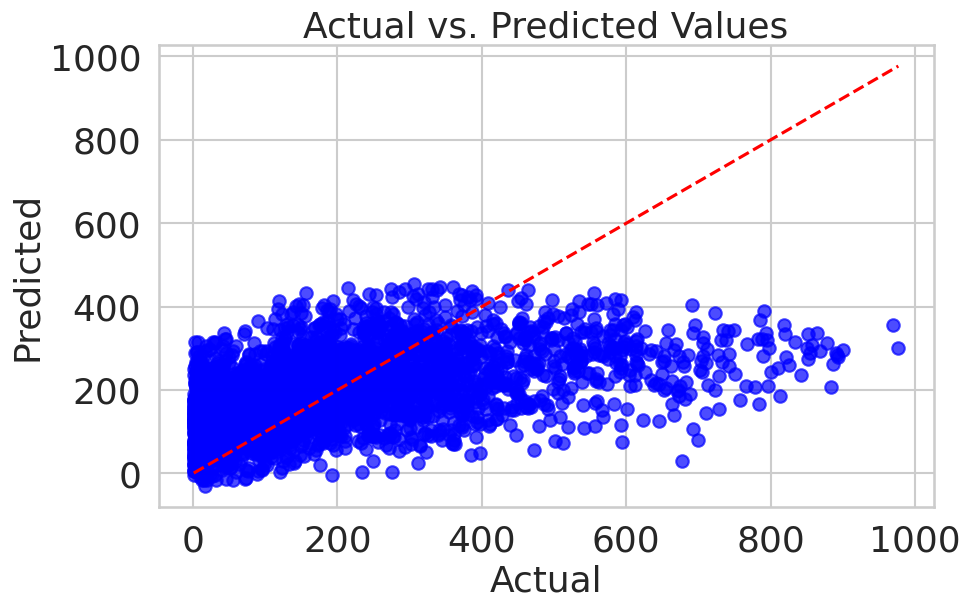

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

The variables "temp" and "atemp" seem to be highly correlated, with an exception on one datapoint in September 2013. Therefor we should delate this variable to avoid multicollinearity, if we want to create a statistical model. The temperature has a seasonal trend, whereas the humidity and windspeed seem the proceed a bit noise.

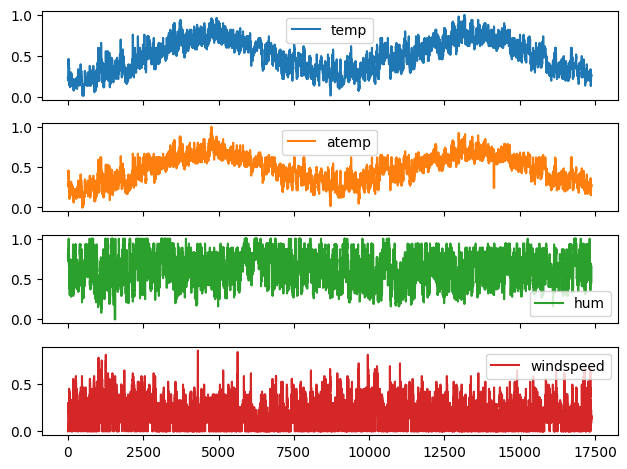

In [128]:
daily_df.loc[:,'temp':'windspeed'].plot(subplots=True)
plt.xlabel("")
plt.tight_layout()
plt.show()

Now we pay attention to our dependent variable (the one we want to predict). Here we plot a timeseries of the count of bikes that were rented per day.

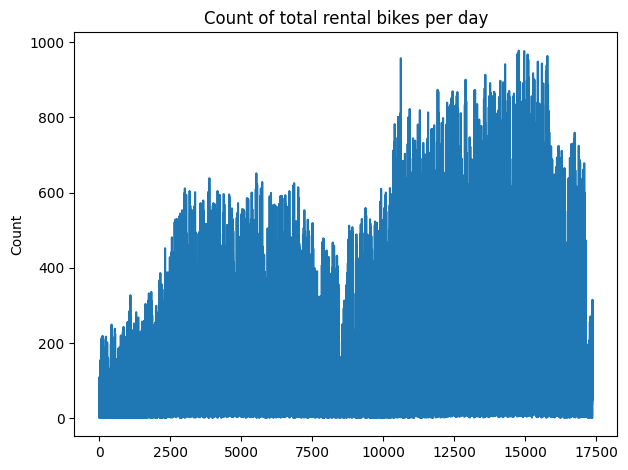

In [129]:
daily_df.cnt.plot(title = "Count of total rental bikes per day")
plt.xlabel("")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Now we have a look at potential outliers.
Let's start with the day with the fewest rentals. The 29t of October 2012 was officially a normal working day, but state of emergency prevailed in D.C. and Maryland, because of Hurricane Kathrina.
In a nutshell it's not an outlier in that sense, that it is a mistake in the dataset. But state of emergency (or state of exception) is an exception by definition and you could also argue that it's an outlier.

In [133]:
daily_df[['casual','registered','cnt']].describe()

casual    registered           cnt
count  17379.000000  17379.000000  17379.000000
mean      35.676218    153.786869    189.463088
std       49.305030    151.357286    181.387599
min        0.000000      0.000000      1.000000
25%        4.000000     34.000000     40.000000
50%       17.000000    115.000000    142.000000
75%       48.000000    220.000000    281.000000
max      367.000000    886.000000    977.000000

In [132]:
daily_df[daily_df.cnt == daily_df.cnt.min()]

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
4            5  2011-01-01       1   0     1   4        0        6   
5            6  2011-01-01       1   0     1   5        0        6   
30          31  2011-01-02       1   0     1   7        0        0   
49          50  2011-01-03       1   0     1   4        0        1   
71          72  2011-01-04       1   0     1   2        0        2   
...        ...         ...     ...  ..   ...  ..      ...      ...   
16879    16880  2012-12-11       4   1    12   2        0        2   
17215    17216  2012-12-25       1   1    12   4        1        2   
17237    17238  2012-12-26       1   1    12   2        0        3   
17262    17263  2012-12-27       1   1    12   3        0        4   
17358    17359  2012-12-31       1   1    12   3        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
4               0           1  0.24  0.2879  0.75     0.0000       0   
5               0           2  0.24  0.2576  0.75     0.0896       0   
30              0           2  0.40  0.4091  0.76     0.1940       0   
49              1           1  0.16  0.1364  0.47     0.3881       0   
71              1           1  0.14  0.1515  0.63     0.1343       0   
...           ...         ...   ...     ...   ...        ...     ...   
16879           1           2  0.40  0.4091  0.66     0.3284       0   
17215           0           2  0.24  0.2576  0.87     0.0896       0   
17237           1           2  0.26  0.2273  0.65     0.2985       0   
17262           1           2  0.24  0.2273  0.87     0.2239       0   
17358           1           1  0.16  0.1818  0.59     0.1045       0   

       registered  cnt  
4               1    1  
5               1    1  
30              1    1  
49              1    1  
71              1    1  
...           ...  ...  
16879           1    1  
17215           1    1  
17237           1    1  
17262           1    1  
17358           1    1  

[158 rows x 17 columns]

In [ ]:
# Configuring plotting visual and sizes
sns.set_style('whitegrid')
sns.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

[Text(0.5, 1.0, 'Season wise hourly distribution of counts')]

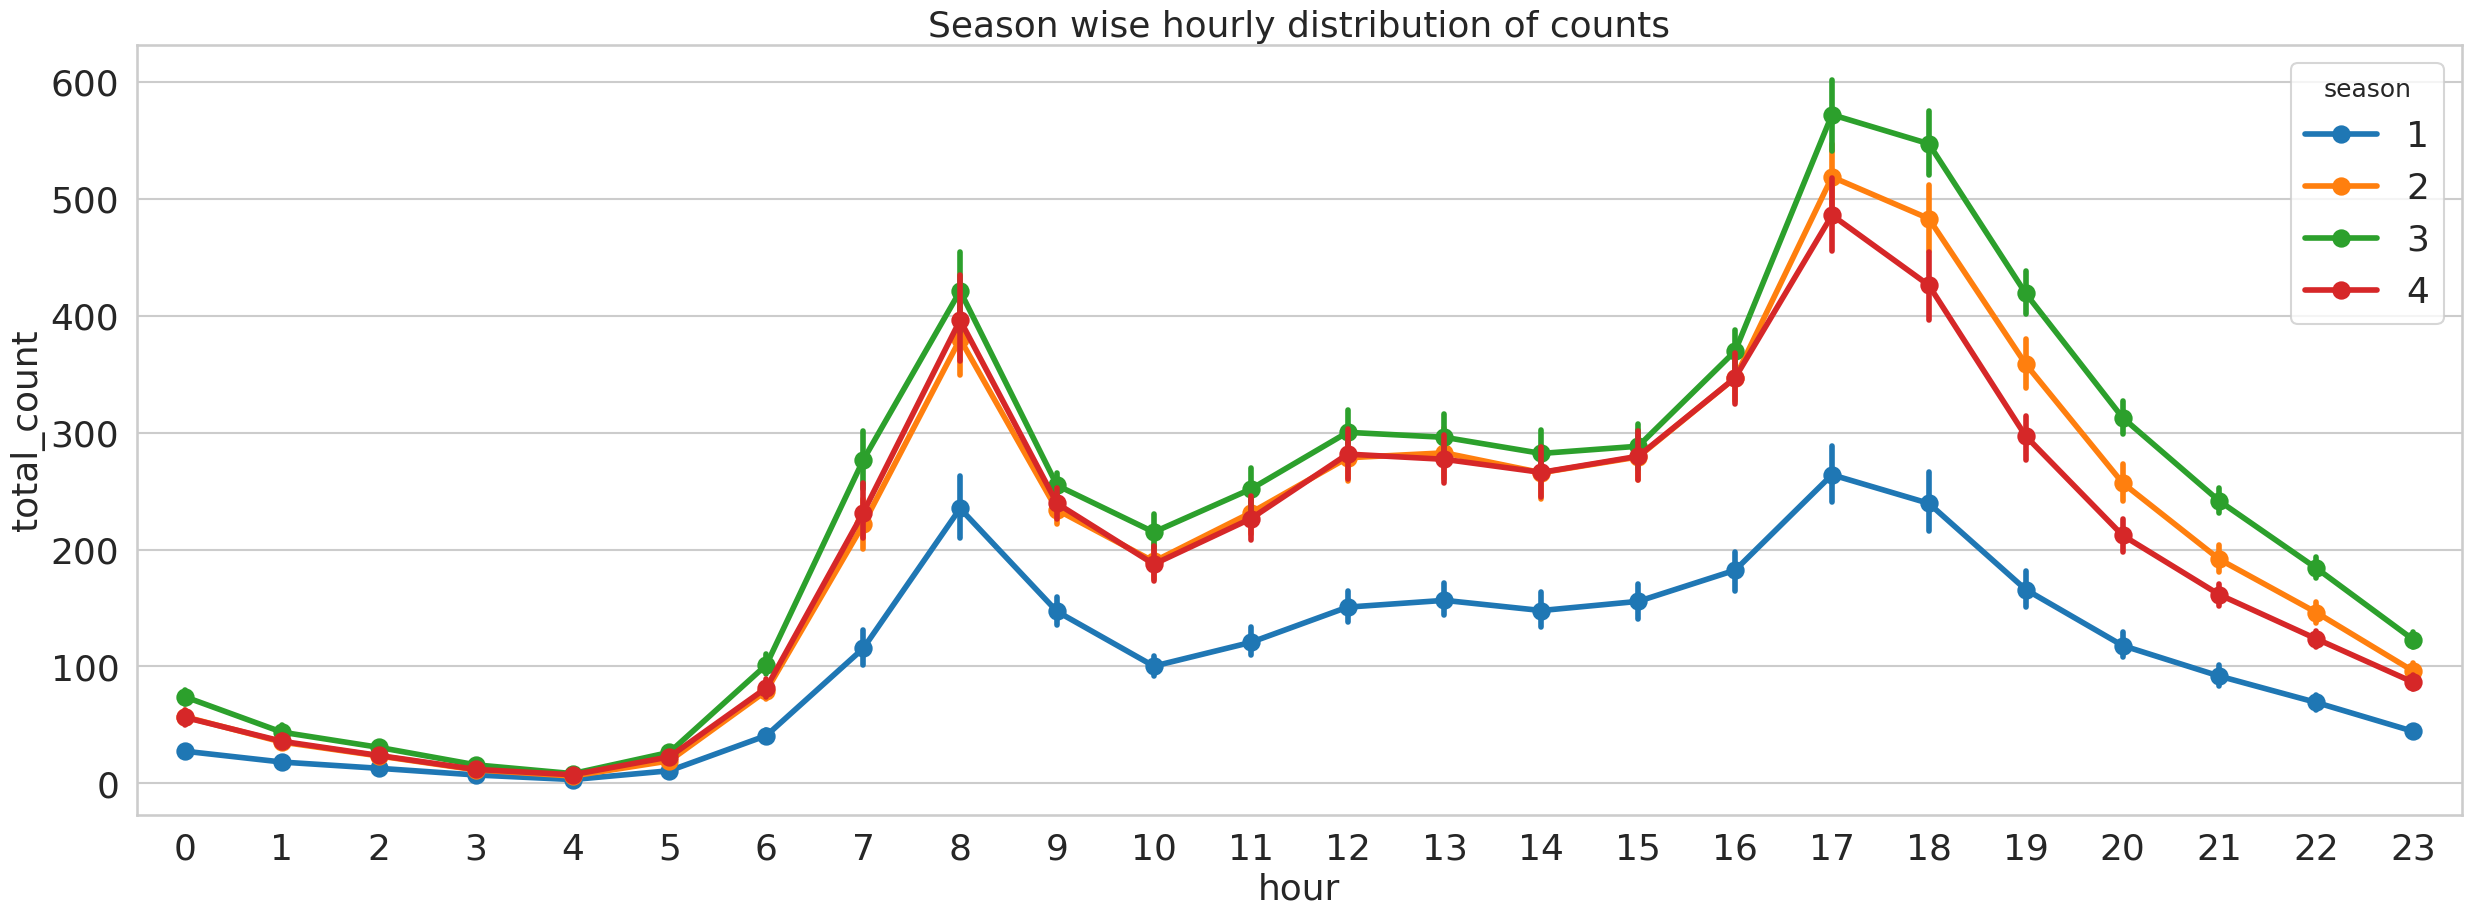

In [ ]:
fig,ax = plt.subplots()
sns.pointplot(data=hour_df[['hour',
                           'total_count',
                           'season']],
              x='hour',
              y='total_count',
              hue='season',
              ax=ax)
ax.set(title="Season wise hourly distribution of counts")

[Text(0.5, 1.0, 'Weekday wise hourly distribution of counts')]

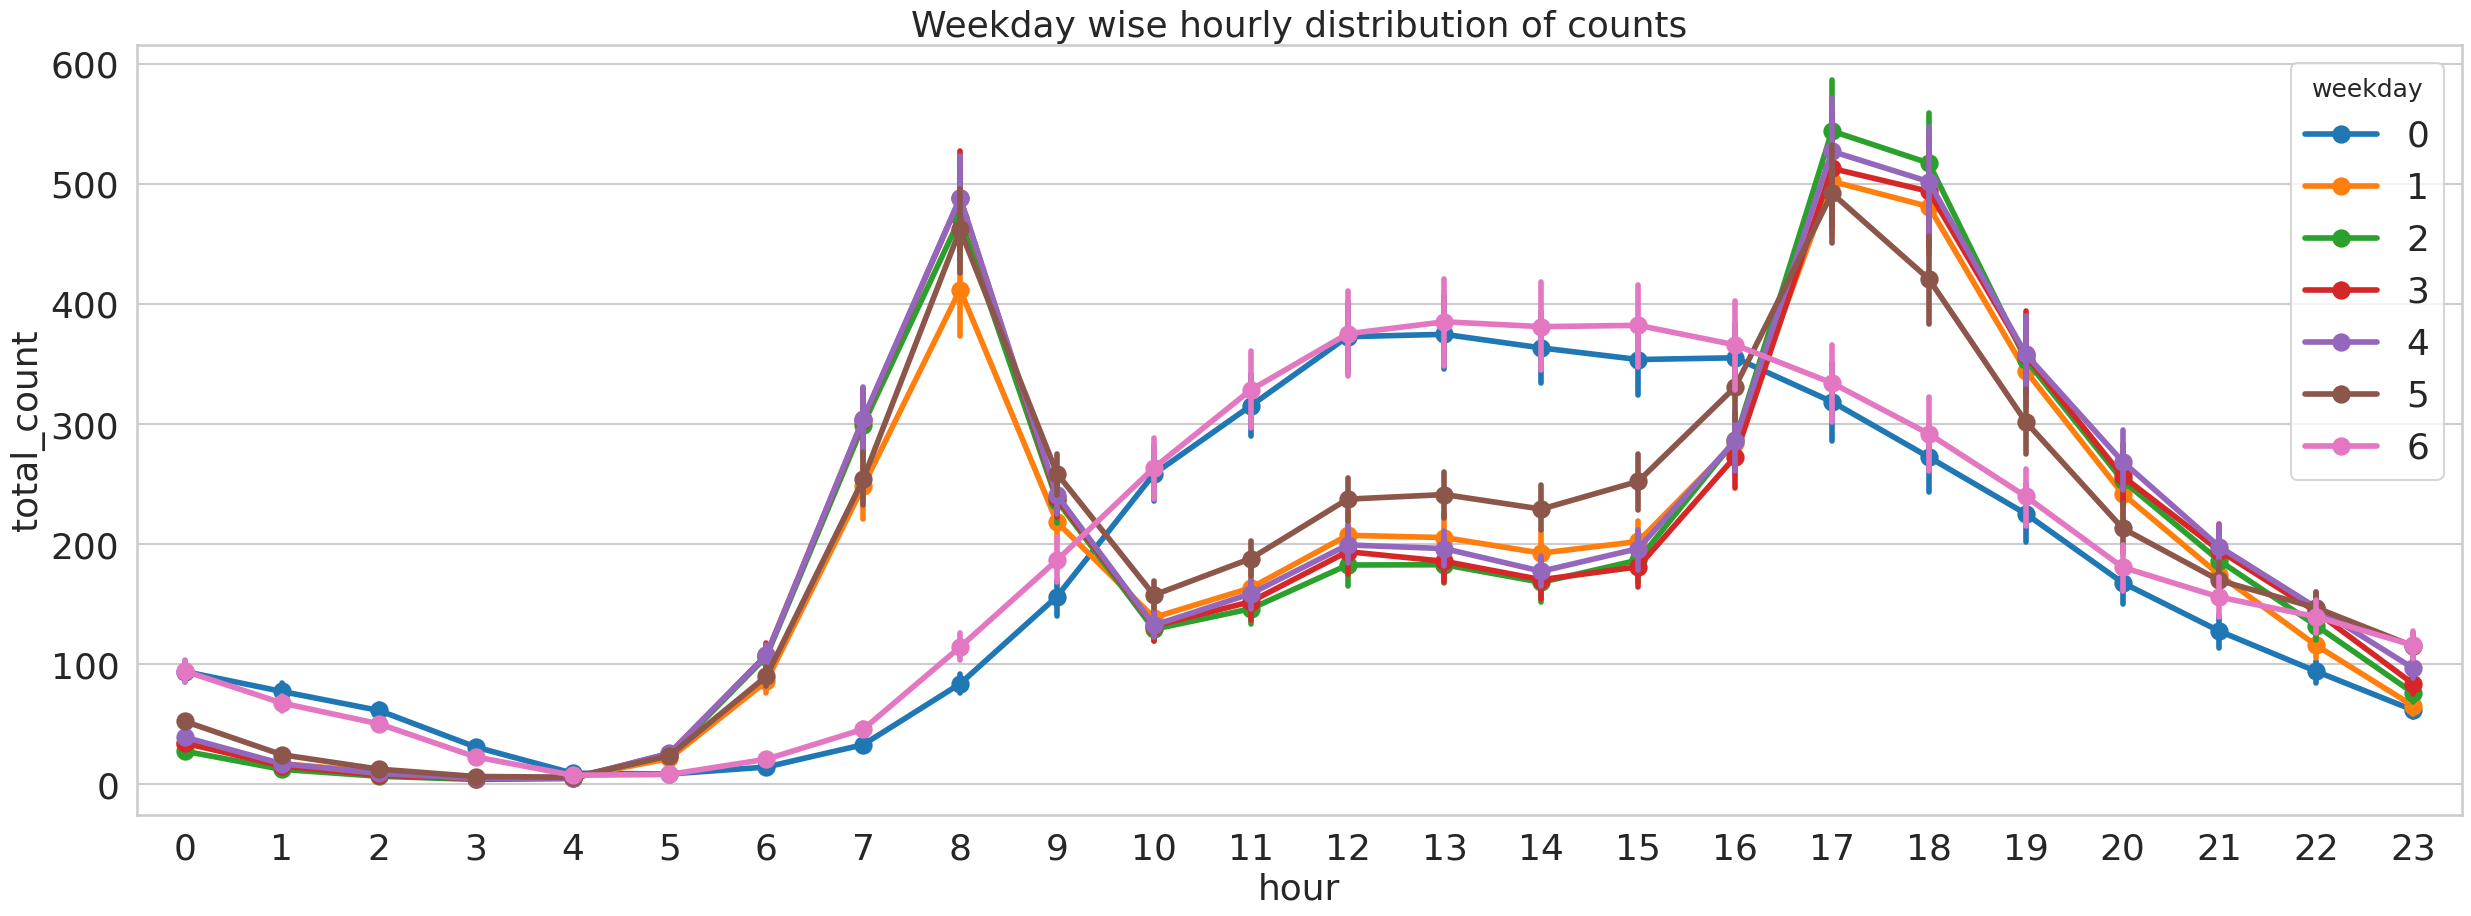

In [ ]:
fig,ax = plt.subplots()
sns.pointplot(data=hour_df[['hour',
                           'total_count',
                           'weekday']],
              x='hour',
              y='total_count',
              hue='weekday',
              ax=ax)
ax.set(title="Weekday wise hourly distribution of counts")

[Text(0.5, 1.0, 'Monthly distribution of counts')]

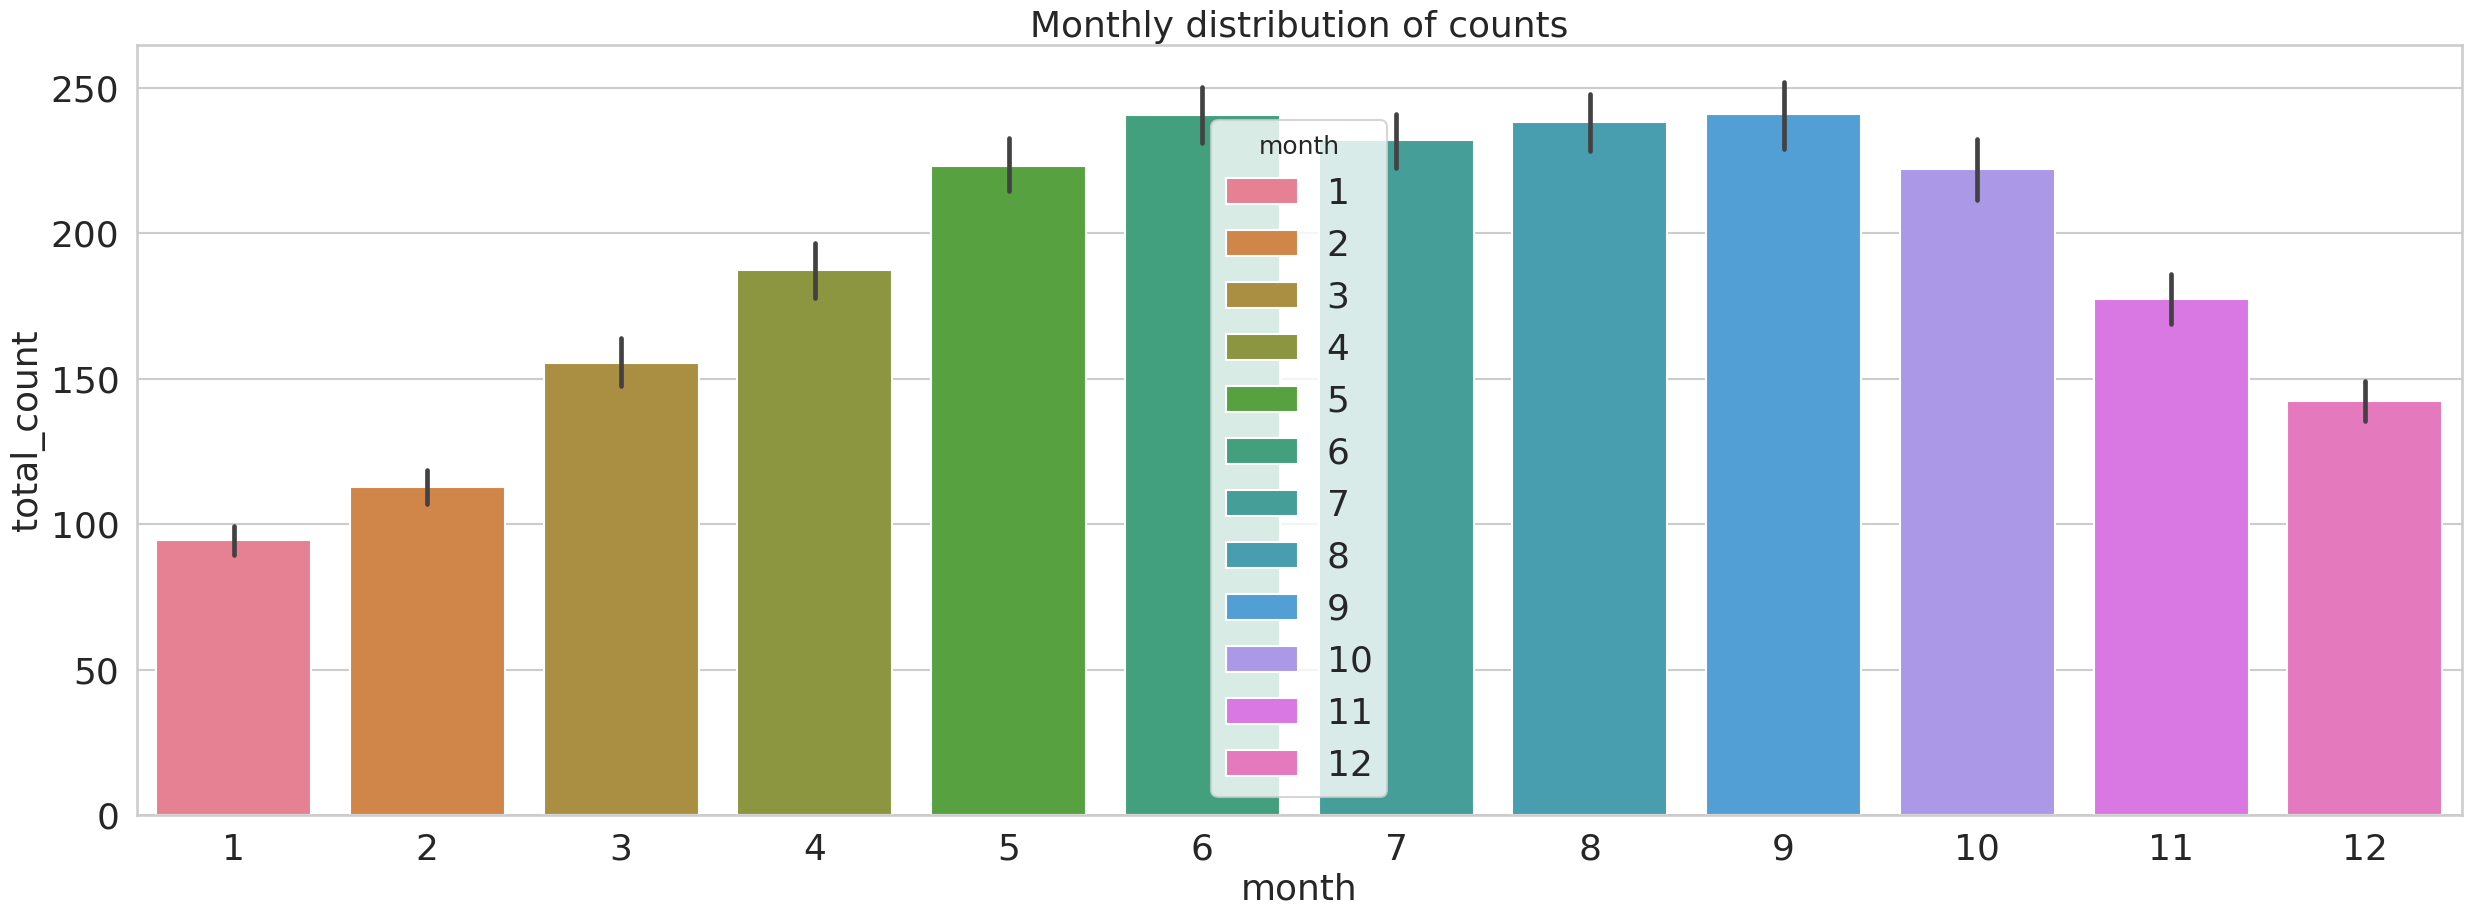

In [ ]:
fig,ax = plt.subplots()
sns.barplot(data=hour_df[['month',
                           'total_count']],
              x='month',
              y='total_count',
              hue='month',
              ax=ax)
ax.set(title="Monthly distribution of counts")

[Text(0.5, 1.0, 'Seasonal distribution of counts')]

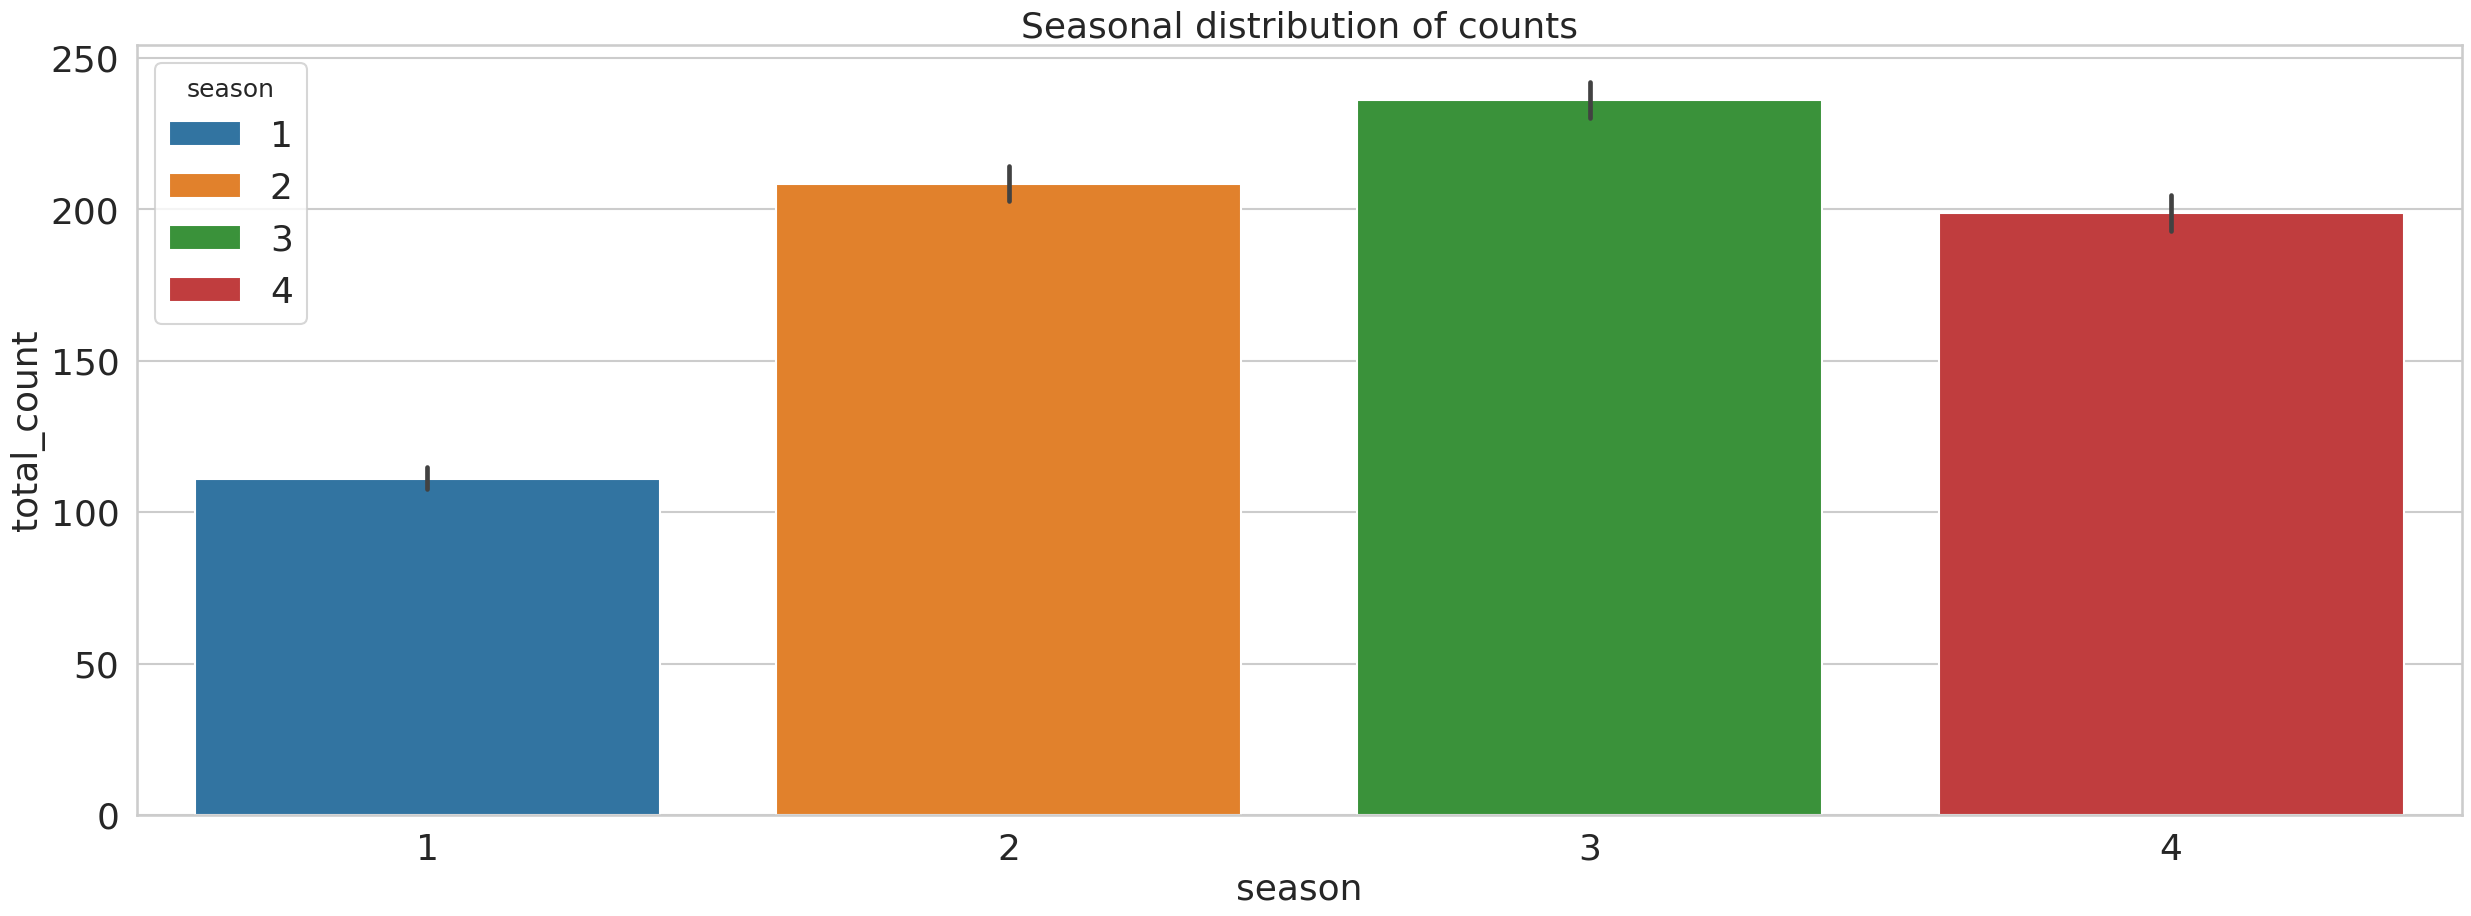

In [ ]:
fig,ax = plt.subplots()
sns.barplot(data=hour_df[['season',
                           'total_count']],
              x='season',
              y='total_count',
              hue='season',
              ax=ax)
ax.set(title="Seasonal distribution of counts")

[Text(0.5, 1.0, 'Year distribution of counts')]

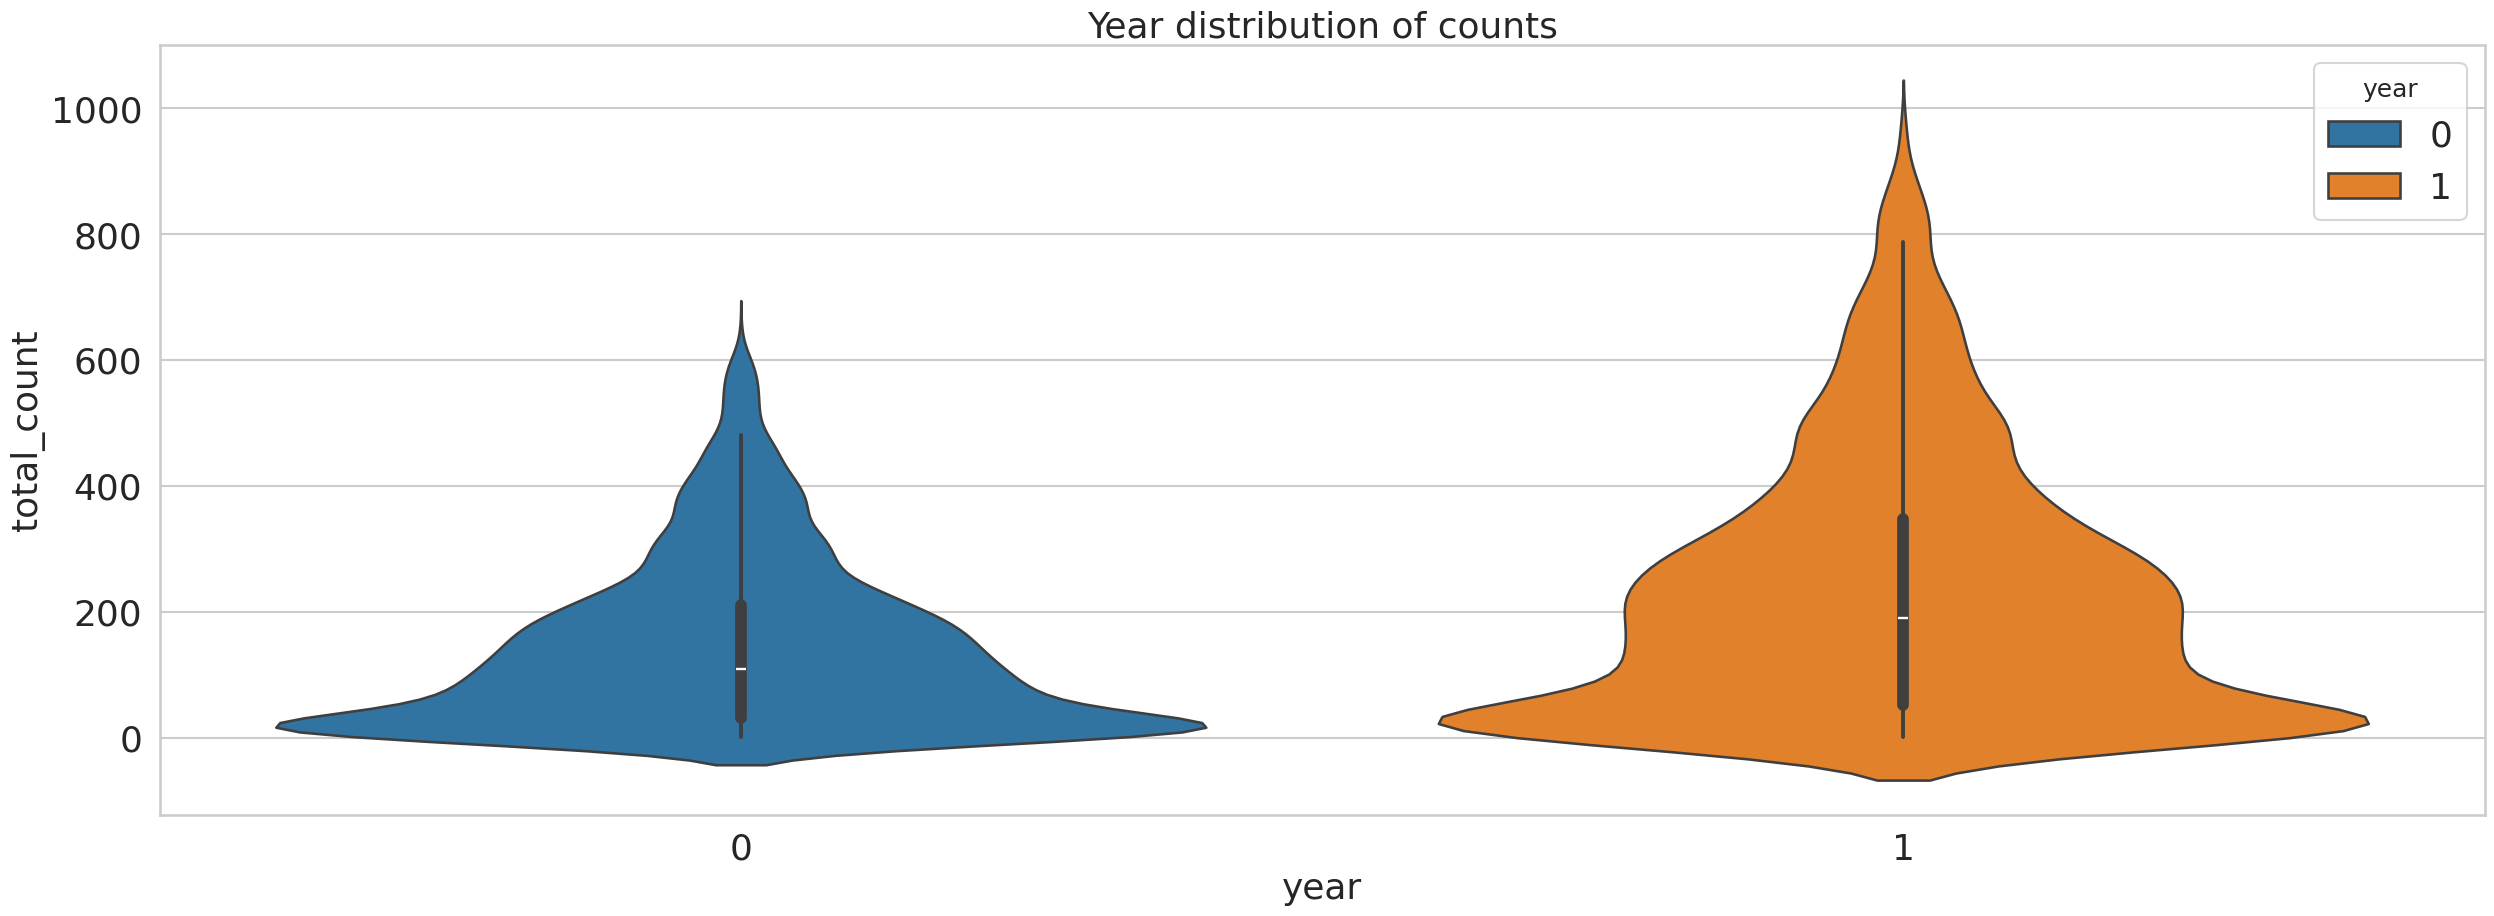

In [ ]:
fig,ax = plt.subplots()
sns.violinplot(data=hour_df[['year',
                           'total_count']],
              x='year',
              y='total_count',
              hue= 'year',
              ax=ax)
ax.set(title="Year distribution of counts")

# Checking for outliners:
The description of the dependant variables shows that on average the number of bikes rented by registered users is four times as high as for casual user. Unlike the monthly variation the daily variation is higher for registered users (you can see that by the standard deviation).

<Axes: >

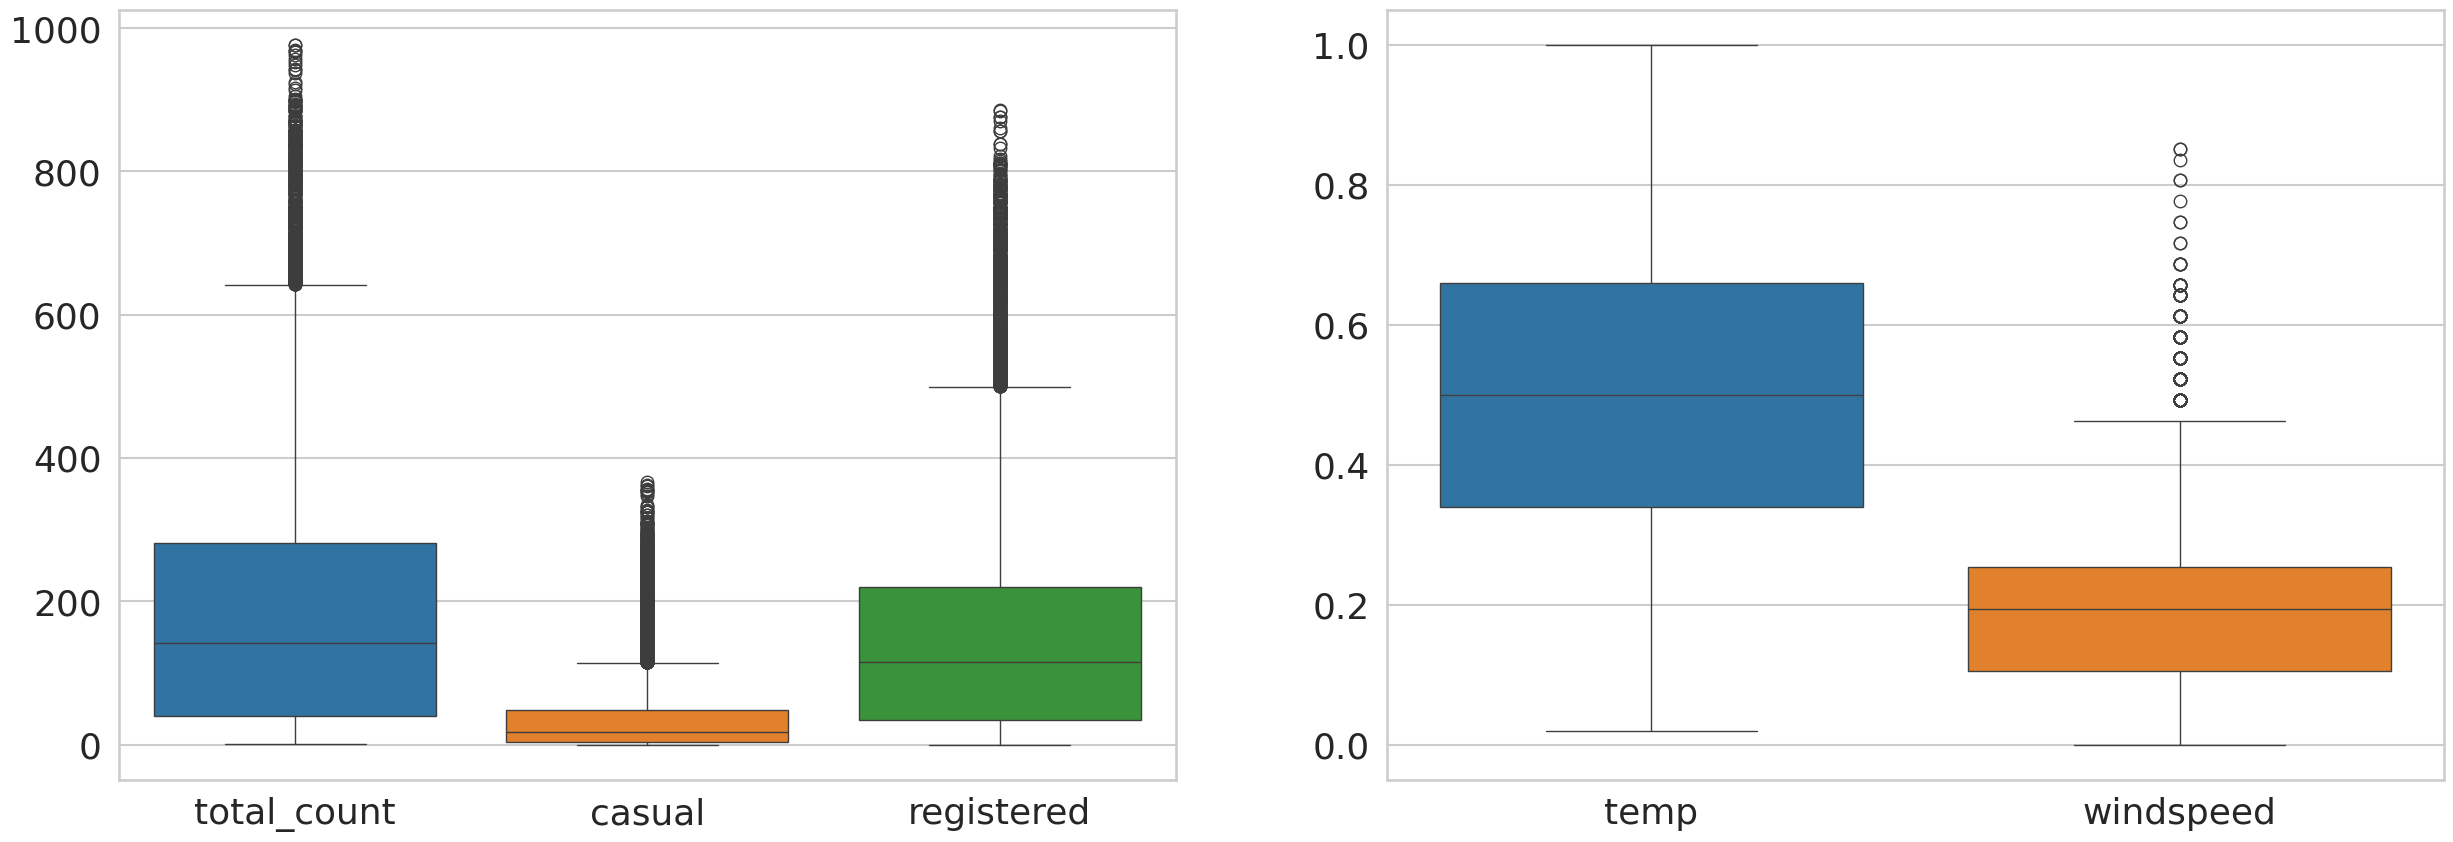

In [ ]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
sns.boxplot(data=hour_df[['total_count',
                          'casual',
                          'registered']],ax=ax1)
sns.boxplot(data=hour_df[['temp',
                          'windspeed']],ax=ax2)

[Text(0.5, 1.0, 'Checking for outliners in day hours')]

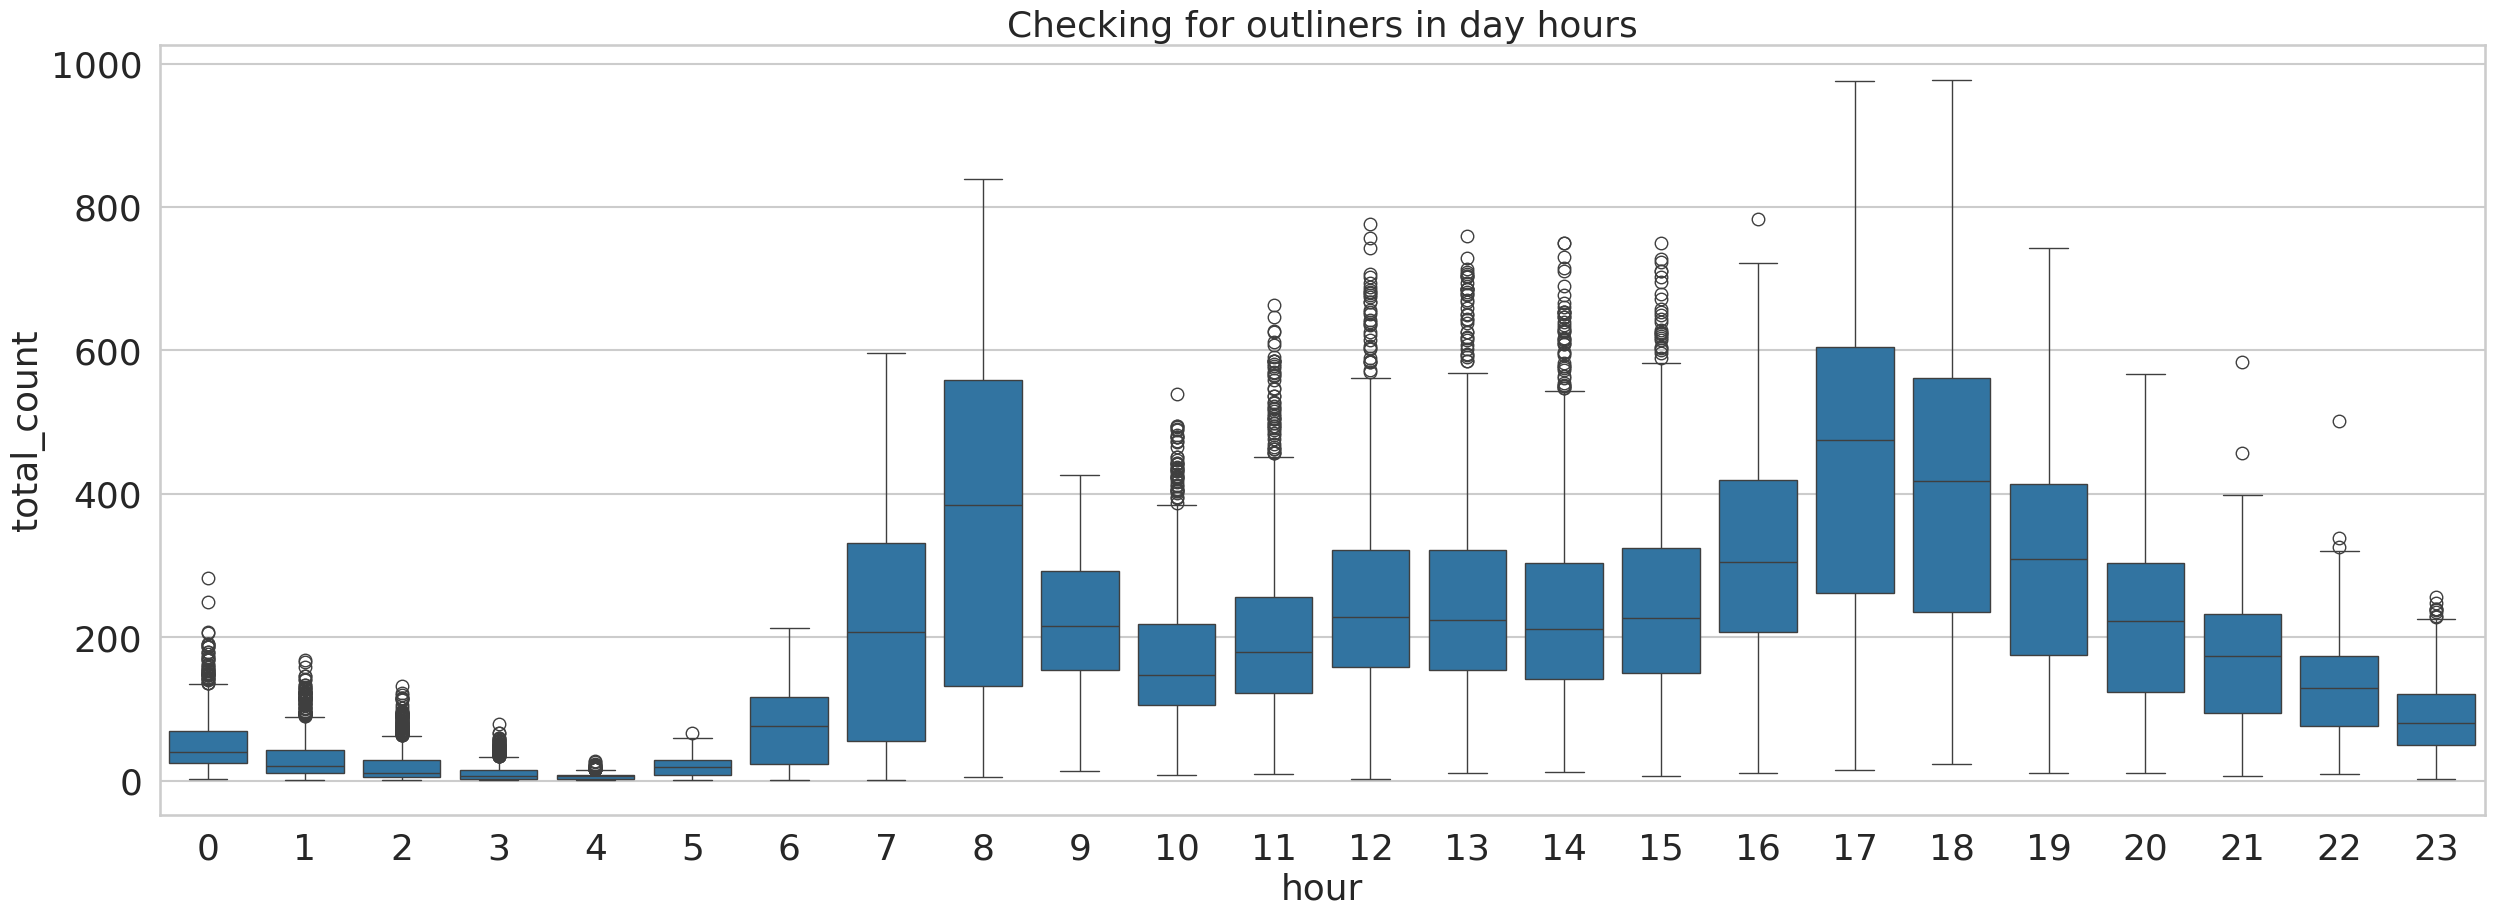

In [ ]:
fig,ax = plt.subplots()
sns.boxplot(data=hour_df[['total_count',
                          'hour']],x='hour',y='total_count',ax=ax)
ax.set(title="Checking for outliners in day hours")

# Correlations:

<Axes: >

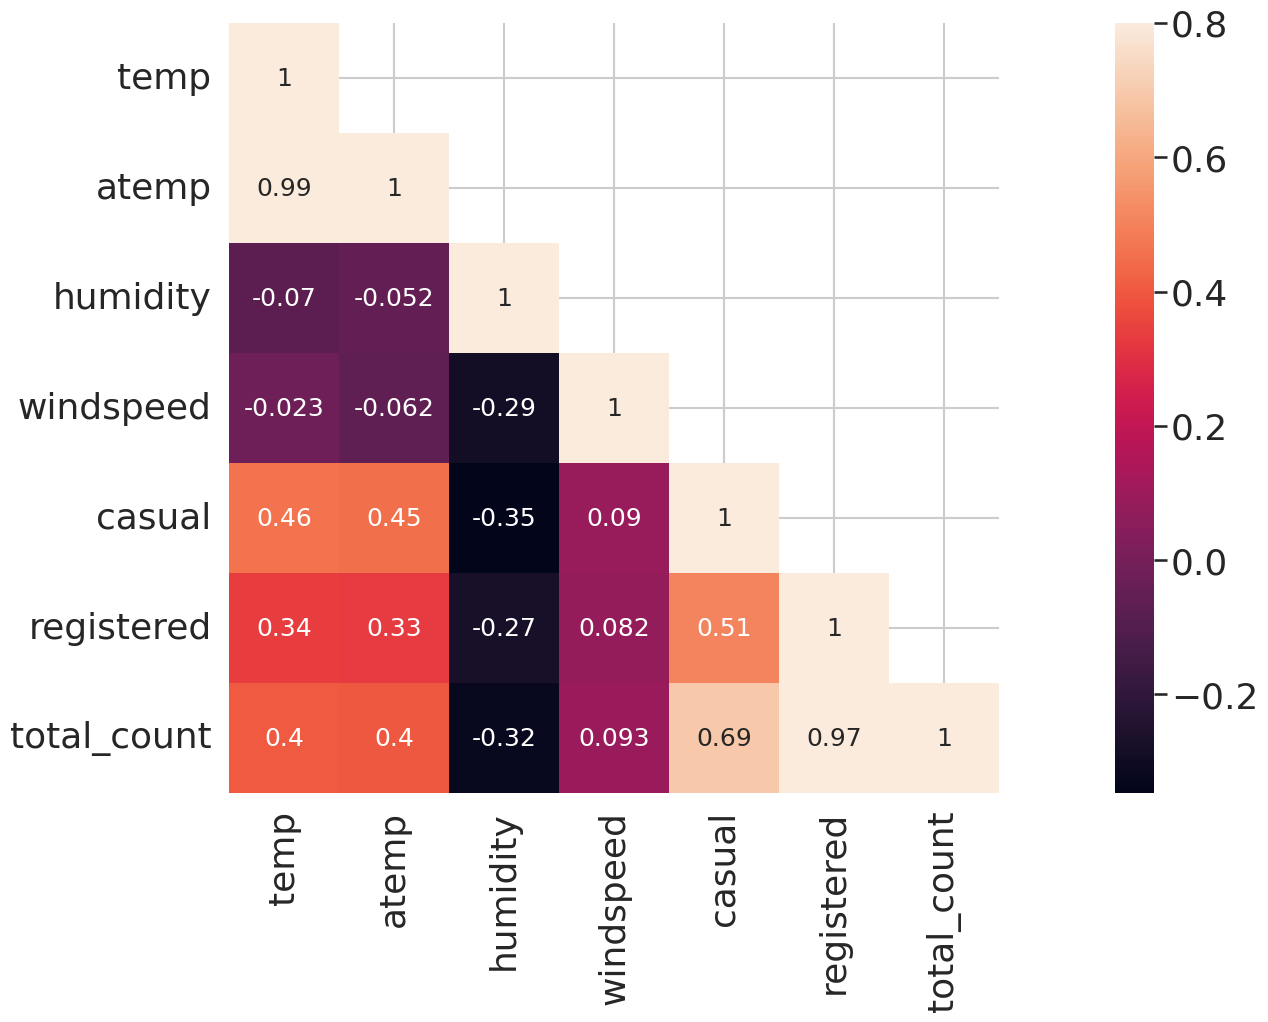

In [ ]:
corrMatt = hour_df[['temp',
                    'atemp',
                    'humidity',
                    'windspeed',
                    'casual',
                    'registered',
                    'total_count']].corr()

mask = np.array(corrMatt)
# Turning the lower-triangle of the array to false
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
sns.heatmap(corrMatt,
            mask=mask,
            vmax=.8,
            square=True,
            annot=True,
            ax=ax)